# COMP3010J - Machine Learning - Kickstarter Project

## Yuyang Wang 19206226

# Import Necessary packages

In [81]:
import time

# data analysis and preparing
import pandas as pd
import math
import numpy as np
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# from tqdm import tqdm

# tqdm.pandas()

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
from sklearn.metrics import auc, roc_curve, confusion_matrix, f1_score

# Read data file
Here we read the data as a DataFrame

* `ID`: internal kickstarter id
* `name`: name of project - A project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films.
* `category`: category
* `main_category`: category of campaign
* `currency`: currency used to support
* `deadline`: deadline for crowdfunding
* `goal`: fundraising goal - The funding goal is the amount of money that a creator needs to complete their project.
* `launched`: date launched
* `pledged`: amount pledged by "crowd"
* `state`: Current condition the project is in
* `usd pledged`: conversion in US dollars of the pledged column (conversion done by kickstarter).
* `usd_pledged_realised at deadline`: conversion in US dollars of the pledged column (conversion from Fixer.io API).
* `usd_goal_real_at_start`: conversion in US dollars of the goal column (conversion from Fixer.io API).

In [82]:
from datetime import datetime

startTime = datetime.now() # To calculate the overall running time of this notebook.

In [83]:
df = pd.read_csv('kickstarter201801.csv') # Read CSV file.

In [84]:
df.head()  # Take a look at first 5 lines

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  09/10/2015   1000.0   
1  Narrative Film  Film & Video      USD  01/11/2017  30000.0   
2  Narrative Film  Film & Video      USD  26/02/2013  45000.0   
3           Music         Music      USD  16/04/2012   5000.0   
4    Film & Video  Film & Video      USD  29/08/2015  19500.0   

           launched  pledged     state  backers country  usd pledged  \
0  11/08/2015 12:12      0.0    failed        0      GB          0.0   
1  02/09/2017 04:43   2421.0    failed       15      US        100.0   
2  12/01/2013 00:20    220.0    failed        3      US        220.0   
3  17/03/2012 03:24      1.0    failed        1      US          1.0   
4  04/07/2015 08:35   1283.0  canceled       14      US       1283.0   

   usd_pledged_realised at deadline  usd_goal_real_at_start  
0                               0.0                 1533.95  
1                            2421.0                30000.00  
2                             220.0                45000.00  
3                               1.0                 5000.00  
4                            1283.0                19500.00

# Check whether there exist missing data

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                378661 non-null  int64  
 1   name                              378657 non-null  object 
 2   category                          378661 non-null  object 
 3   main_category                     378661 non-null  object 
 4   currency                          378661 non-null  object 
 5   deadline                          378661 non-null  object 
 6   goal                              378661 non-null  float64
 7   launched                          378661 non-null  object 
 8   pledged                           378661 non-null  float64
 9   state                             378661 non-null  object 
 10  backers                           378661 non-null  int64  
 11  country                           378661 non-null  o

# Here we found there do exist missing data - imputed

In [86]:
df["usd pledged"].fillna(df["usd pledged"].mode(),inplace = True)

## Data analysis

Firstly we do some preliminary explore to the dataset

In [87]:
df.describe()

ID          goal       pledged        backers   usd pledged  \
count  3.786610e+05  3.786610e+05  3.786610e+05  378661.000000  3.748640e+05   
mean   1.074731e+09  4.908079e+04  9.682979e+03     105.617476  7.036729e+03   
std    6.190862e+08  1.183391e+06  9.563601e+04     907.185035  7.863975e+04   
min    5.971000e+03  1.000000e-02  0.000000e+00       0.000000  0.000000e+00   
25%    5.382635e+08  2.000000e+03  3.000000e+01       2.000000  1.698000e+01   
50%    1.075276e+09  5.200000e+03  6.200000e+02      12.000000  3.947200e+02   
75%    1.610149e+09  1.600000e+04  4.076000e+03      56.000000  3.034090e+03   
max    2.147476e+09  1.000000e+08  2.033899e+07  219382.000000  2.033899e+07   

       usd_pledged_realised at deadline  usd_goal_real_at_start  
count                      3.786610e+05            3.786610e+05  
mean                       9.058924e+03            4.545440e+04  
std                        9.097334e+04            1.152950e+06  
min                        0.000000e+00            1.000000e-02  
25%                        3.100000e+01            2.000000e+03  
50%                        6.243300e+02            5.500000e+03  
75%                        4.050000e+03            1.550000e+04  
max                        2.033899e+07            1.663614e+08

In [88]:
df.describe(percentiles=[.1, .2, .6, .7, .8, .9, .95, .99])

ID          goal       pledged        backers   usd pledged  \
count  3.786610e+05  3.786610e+05  3.786610e+05  378661.000000  3.748640e+05   
mean   1.074731e+09  4.908079e+04  9.682979e+03     105.617476  7.036729e+03   
std    6.190862e+08  1.183391e+06  9.563601e+04     907.185035  7.863975e+04   
min    5.971000e+03  1.000000e-02  0.000000e+00       0.000000  0.000000e+00   
10%    2.164103e+08  6.750000e+02  0.000000e+00       0.000000  0.000000e+00   
20%    4.312514e+08  1.500000e+03  1.000000e+01       1.000000  1.410000e+00   
50%    1.075276e+09  5.200000e+03  6.200000e+02      12.000000  3.947200e+02   
60%    1.290010e+09  9.000000e+03  1.411010e+03      23.000000  9.580000e+02   
70%    1.502856e+09  1.250000e+04  2.925000e+03      42.000000  2.085000e+03   
80%    1.716708e+09  2.080000e+04  5.729000e+03      76.000000  4.422754e+03   
90%    1.932083e+09  5.000000e+04  1.414126e+04     166.000000  1.085970e+04   
95%    2.039733e+09  9.000000e+04  2.958100e+04     334.000000  2.243285e+04   
99%    2.125552e+09  4.000000e+05  1.348307e+05    1506.000000  9.624458e+04   
max    2.147476e+09  1.000000e+08  2.033899e+07  219382.000000  2.033899e+07   

       usd_pledged_realised at deadline  usd_goal_real_at_start  
count                      3.786610e+05            3.786610e+05  
mean                       9.058924e+03            4.545440e+04  
std                        9.097334e+04            1.152950e+06  
min                        0.000000e+00            1.000000e-02  
10%                        0.000000e+00            7.000000e+02  
20%                        1.023000e+01            1.500000e+03  
50%                        6.243300e+02            5.500000e+03  
60%                        1.415000e+03            8.560180e+03  
70%                        2.909000e+03            1.242221e+04  
80%                        5.665220e+03            2.000000e+04  
90%                        1.367099e+04            4.500000e+04  
95%                        2.809000e+04            8.000000e+04  
99%                        1.226284e+05            3.382241e+05  
max                        2.033899e+07            1.663614e+08

In [89]:
# Only categorical features
df.describe(include=['O'])

name        category main_category currency    deadline  \
count   378657          378661        378661   378661      378661   
unique  375722             159            15       14        3164   
top     #NAME?  Product Design  Film & Video      USD  08/08/2014   
freq        43           22314         63585   295365         705   

                launched   state country  
count             378661  378661  378661  
unique            347035       6      23  
top     20/06/2017 16:00  failed      US  
freq                  15  197719  292627

# Correlation

From the data below we can know that, the mean value of `usd pledged` for `Design` is the highest, while the mean value of `usd pledged` for `Crafts` category is lowest.

In [90]:
df[['main_category', 'usd pledged']].groupby(['main_category'], as_index=False).mean().sort_values(by='usd pledged',
                                                                                                   ascending=False)

main_category   usd pledged
4         Design  17033.026574
8          Games  16306.194882
13    Technology  15457.306964
6   Film & Video   5532.577810
1         Comics   5344.016859
5        Fashion   4279.731233
7           Food   4209.934253
14       Theater   3554.355087
10         Music   3356.870405
3          Dance   2962.990149
11   Photography   2799.380219
12    Publishing   2633.735852
0            Art   2534.057110
9     Journalism   2156.545440
2         Crafts   1179.190619

From the data shown below we know that the category `Technology` has the highest goal (on average). While `Dance` category `Technology` has the low goal (on average)

In [91]:
df[['main_category', 'usd_goal_real_at_start']].groupby(['main_category'], as_index=False).mean().sort_values(
    by='usd_goal_real_at_start', ascending=False)

main_category  usd_goal_real_at_start
13    Technology           102288.542838
9     Journalism            86003.395014
6   Film & Video            82625.292253
7           Food            49039.620802
8          Games            44923.741408
4         Design            41871.388591
0            Art            39198.575879
14       Theater            27088.321275
12    Publishing            24798.240254
5        Fashion            22412.409361
1         Comics            19571.430669
10         Music            15372.161844
11   Photography            12266.843699
2         Crafts            10434.466228
3          Dance             9588.328548

# Visualizing data

# Overview of our target feature

From the graph below we can know that, the `failed` project takes the highest ratio, the `successful` ratio is about 35%. While the `suspended` type takes the lowest ratio of 0.49%

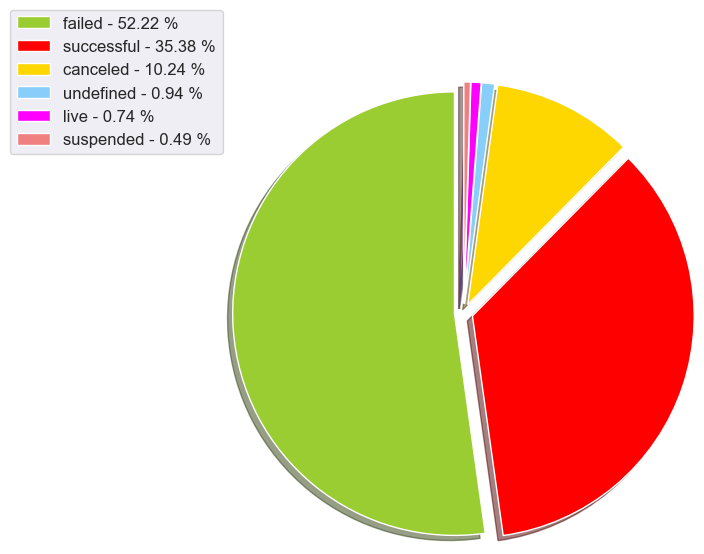

In [92]:
fig = plt.figure(figsize=(28, 6))
state_value_counts = df['state'].value_counts()
x = np.char.array([str(i) for i in state_value_counts.index])
y = np.array(state_value_counts.values)
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'magenta', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow',
          'grey', 'violet', 'white', 'cyan'][:len(state_value_counts.index)]
explode = [0.05] * len(state_value_counts.index)
porcent = 100. * y / y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow=True,
                         wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, explode=explode)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, y),
                                         key=lambda x: x[2],
                                         reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.5, 1.),
           fontsize=12)

plt.show()

# Drop state `undefined`

* `undefined`: means that the state is unknown and should be dropped.

In [93]:
df = df[df['state'] != "undefined"]
df.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  09/10/2015   1000.0   
1  Narrative Film  Film & Video      USD  01/11/2017  30000.0   
2  Narrative Film  Film & Video      USD  26/02/2013  45000.0   
3           Music         Music      USD  16/04/2012   5000.0   
4    Film & Video  Film & Video      USD  29/08/2015  19500.0   

           launched  pledged     state  backers country  usd pledged  \
0  11/08/2015 12:12      0.0    failed        0      GB          0.0   
1  02/09/2017 04:43   2421.0    failed       15      US        100.0   
2  12/01/2013 00:20    220.0    failed        3      US        220.0   
3  17/03/2012 03:24      1.0    failed        1      US          1.0   
4  04/07/2015 08:35   1283.0  canceled       14      US       1283.0   

   usd_pledged_realised at deadline  usd_goal_real_at_start  
0                               0.0                 1533.95  
1                            2421.0                30000.00  
2                             220.0                45000.00  
3                               1.0                 5000.00  
4                            1283.0                19500.00

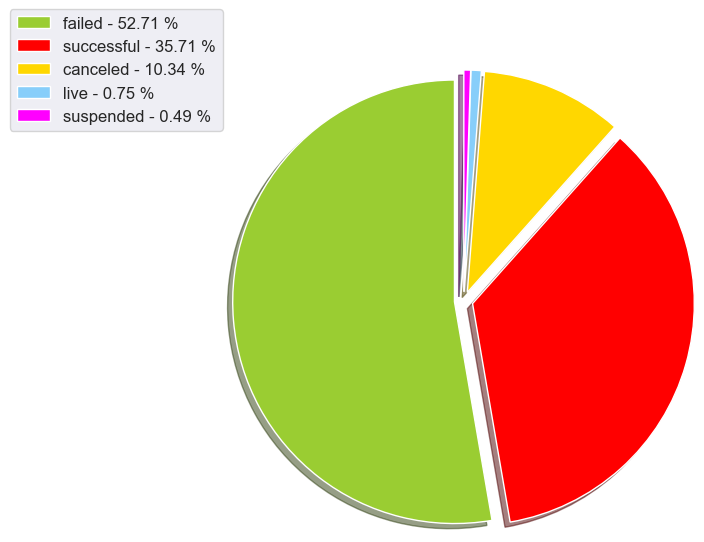

In [94]:
fig = plt.figure(figsize=(28, 6))
state_value_counts = df['state'].value_counts()
x = np.char.array([str(i) for i in state_value_counts.index])
y = np.array(state_value_counts.values)
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'magenta', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow',
          'grey', 'violet', 'white', 'cyan'][:len(state_value_counts.index)]
explode = [0.05] * len(state_value_counts.index)
porcent = 100. * y / y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow=True,
                         wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, explode=explode)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, y),
                                         key=lambda x: x[2],
                                         reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.5, 1.),
           fontsize=12)

plt.show()

# Unbalance data

# Firstly we take a look at `goal` and `pledged`

Here `goal` and `pledged` are unconverted value (i.e. in their own currency)

<AxesSubplot: xlabel='state', ylabel='pledged'>

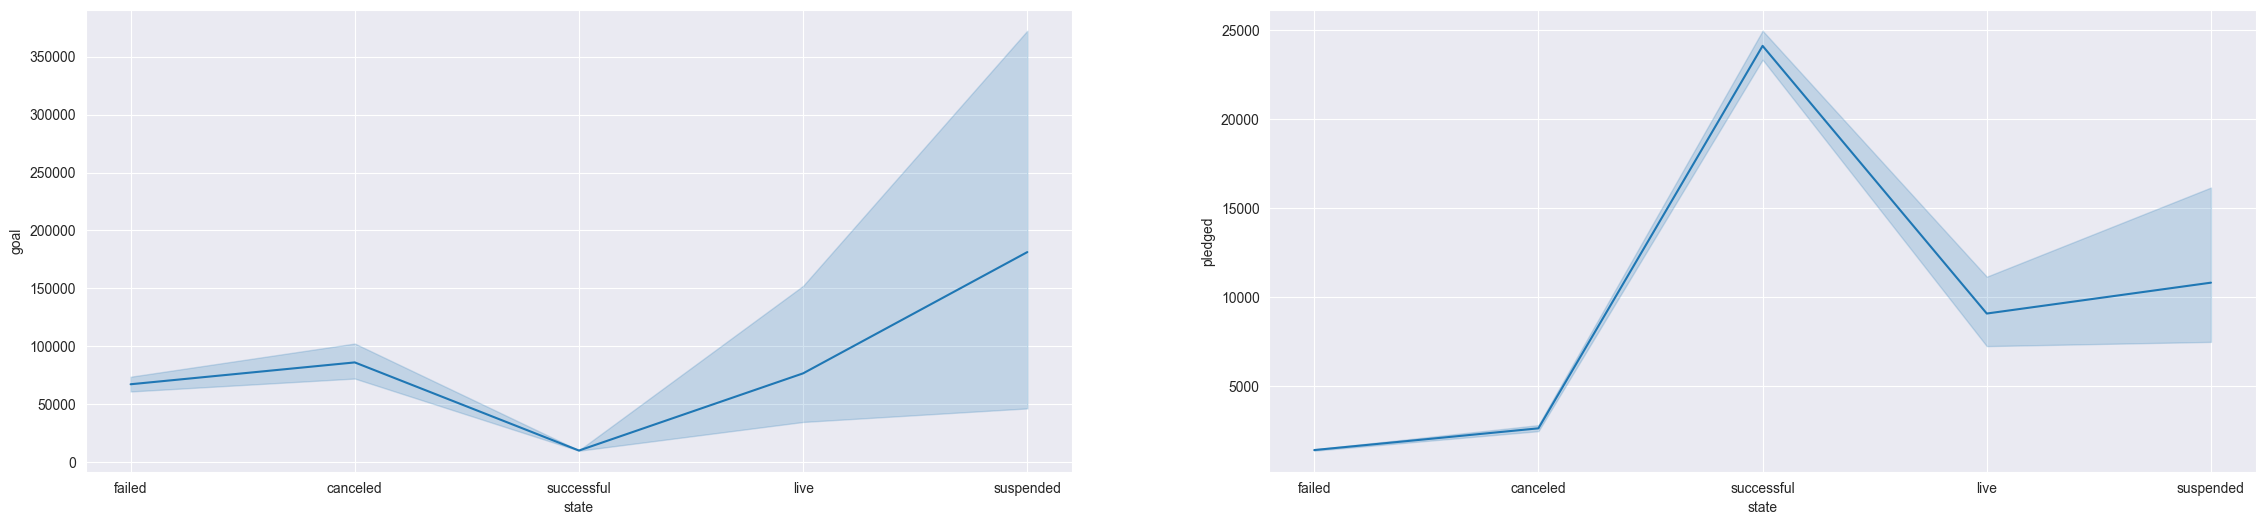

In [95]:
fig = plt.figure(figsize=(28, 6))

ax = fig.add_subplot(121)
sns.lineplot(x='state', y='goal', data=df, ax=ax)

ax = fig.add_subplot(122)
sns.lineplot(x='state', y='pledged', data=df, ax=ax)


# From the graph we know that...

Here, we know that the goal of a kickstarter project is really high. Then, this project might be **suspended**.
So `goal` column is a good descriptive feature for us to determine whether a project will get **suspend** or not.

# Why the data set contains converted pledged value?

 I found the following information from the Internet.

* `usd_goal_real_at_start`: conversion in US dollars of the goal column (conversion from Fixer.io API).
* `usd pledged`: conversion in US dollars of the pledged column (conversion done by kickstarter).
* `usd_pledged_realised at deadline`: conversion in US dollars of the pledged column (conversion from Fixer.io API).


<AxesSubplot: xlabel='state', ylabel='usd_pledged_realised at deadline'>

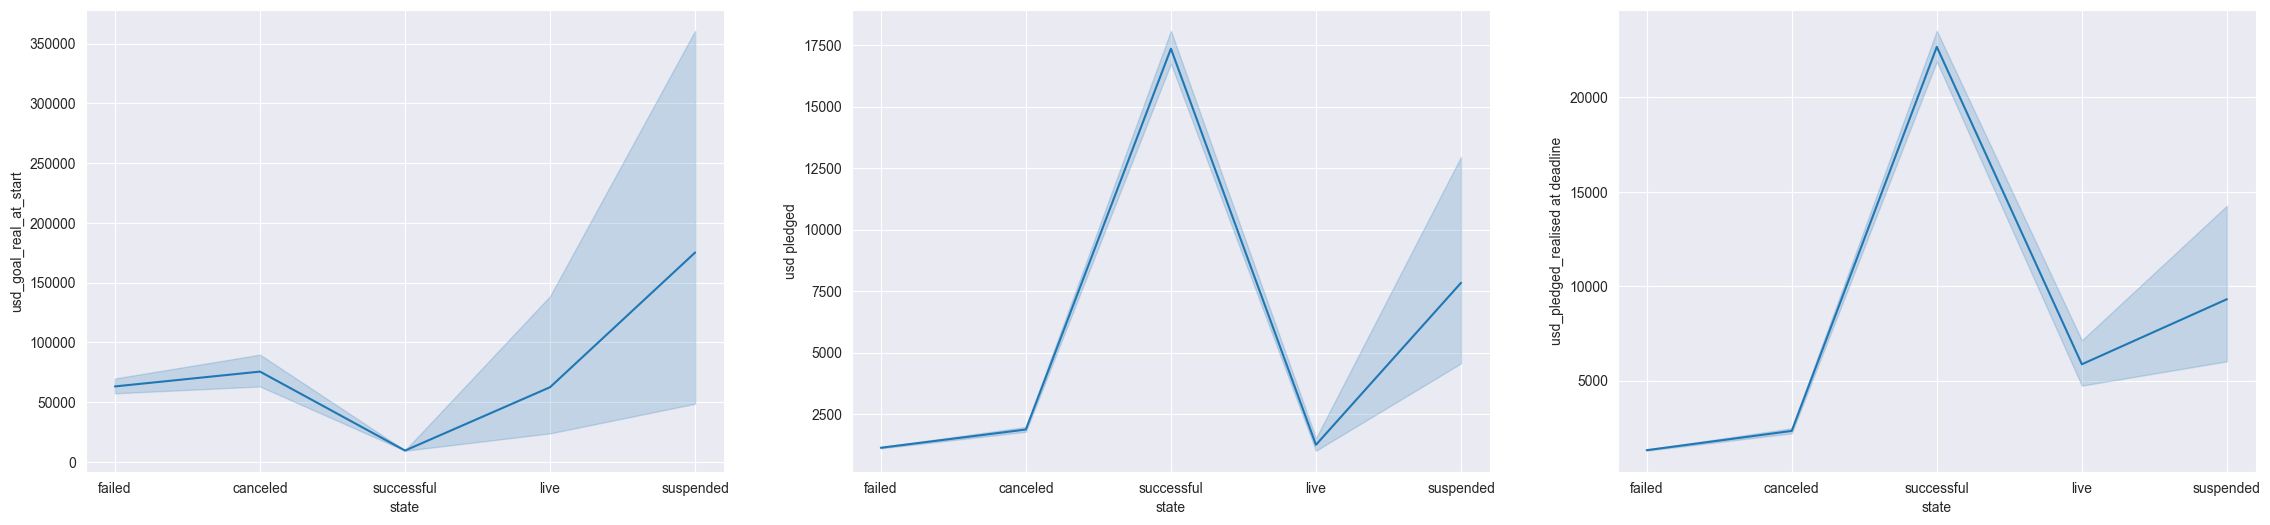

In [96]:
fig = plt.figure(figsize=(28, 6))

ax = fig.add_subplot(131)
sns.lineplot(x='state', y='usd_goal_real_at_start', data=df, ax=ax)  # Converted by third-party API (goal)

ax = fig.add_subplot(132)
sns.lineplot(x='state', y='usd pledged', data=df, ax=ax)  # Converted by kickstarter (pledged)

ax = fig.add_subplot(133)
sns.lineplot(x='state', y='usd_pledged_realised at deadline', data=df, ax=ax)  #  Converted by third-party API (pledged)

# Why dose this dataset contains both third-party API converted pledged value and kickstarter Converted?
We need to take a look at the value between:
* `pledged` (unconverted pledged value)
* `usd pledged` (pledged value converted by kickstarter)
* `usd_pledged_realised at deadline` (pledged value by third-party API)

<AxesSubplot: xlabel='state', ylabel='usd_pledged_realised at deadline'>

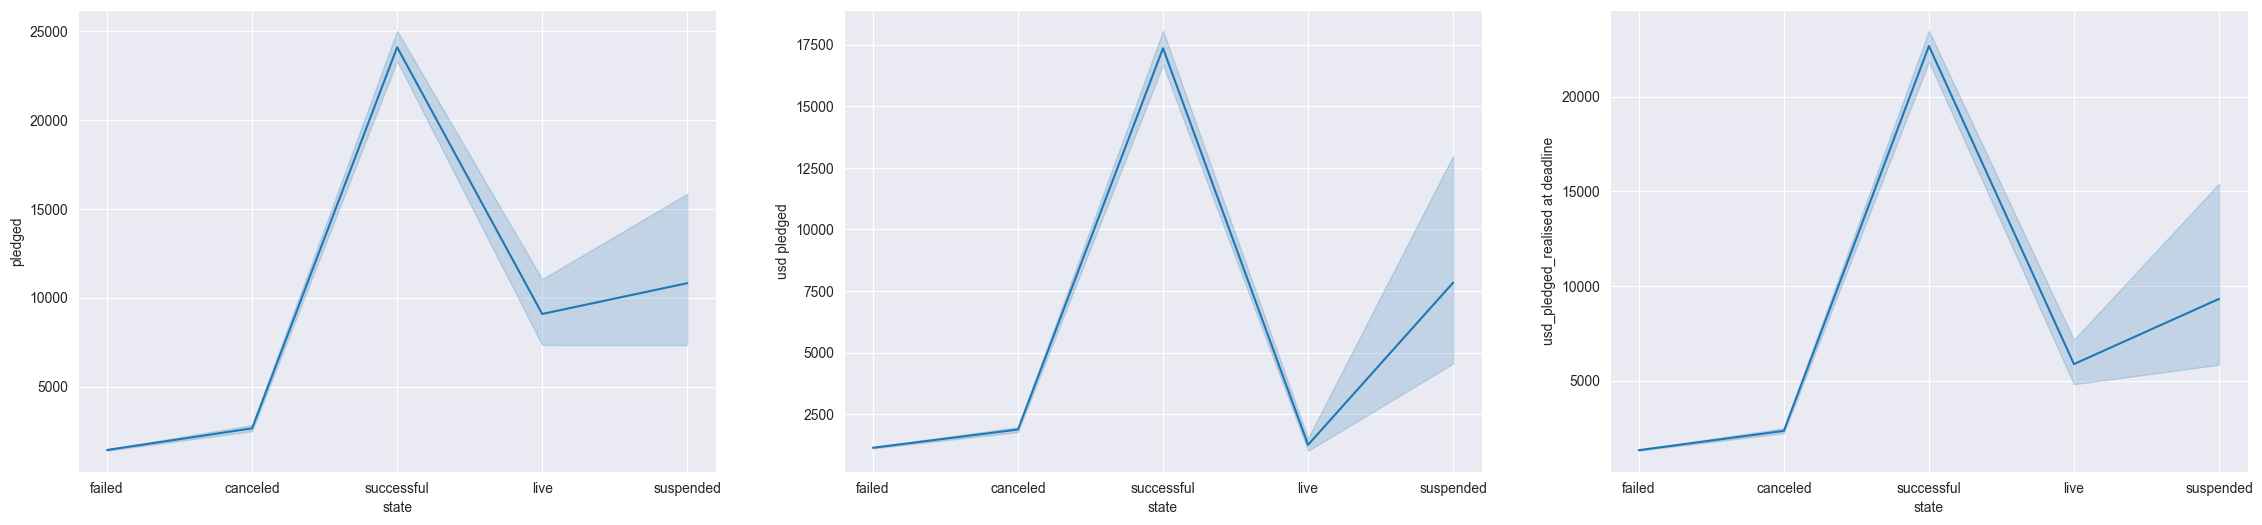

In [97]:
fig = plt.figure(figsize=(28, 6))

ax = fig.add_subplot(131)
sns.lineplot(x='state', y='pledged', data=df, ax=ax)  # Converted by third-party API (goal)

ax = fig.add_subplot(132)
sns.lineplot(x='state', y='usd pledged', data=df, ax=ax)  # Converted by kickstarter (pledged)

ax = fig.add_subplot(133)
sns.lineplot(x='state', y='usd_pledged_realised at deadline', data=df, ax=ax)  #  Converted by third-party API (pledged)

# From the figure we can know that...

* The characteristic of `pledged` and `usd_pledged_realised at deadline` are quite similar
* However, the figure of `usd pledged` is **significantly** different from these two figures

# We need to take some sample to find out why this is the case.

In [98]:
df.head(10)  # Take head 10 sample

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   
5  1000014025                               Monarch Espresso Bar   
6  1000023410  Support Solar Roasted Coffee & Green Energy!  ...   
7  1000030581  Chaser Strips. Our Strips make Shots their B*tch!   
8  1000034518  SPIN - Premium Retractable In-Ear Headphones w...   
9   100004195  STUDIO IN THE SKY - A Documentary Feature Film...   

         category main_category currency    deadline      goal  \
0          Poetry    Publishing      GBP  09/10/2015    1000.0   
1  Narrative Film  Film & Video      USD  01/11/2017   30000.0   
2  Narrative Film  Film & Video      USD  26/02/2013   45000.0   
3           Music         Music      USD  16/04/2012    5000.0   
4    Film & Video  Film & Video      USD  29/08/2015   19500.0   
5     Restaurants          Food      USD  01/04/2016   50000.0   
6            Food          Food      USD  21/12/2014    1000.0   
7          Drinks          Food      USD  17/03/2016   25000.0   
8  Product Design        Design      USD  29/05/2014  125000.0   
9     Documentary  Film & Video      USD  10/08/2014   65000.0   

           launched   pledged       state  backers country  usd pledged  \
0  11/08/2015 12:12      0.00      failed        0      GB         0.00   
1  02/09/2017 04:43   2421.00      failed       15      US       100.00   
2  12/01/2013 00:20    220.00      failed        3      US       220.00   
3  17/03/2012 03:24      1.00      failed        1      US         1.00   
4  04/07/2015 08:35   1283.00    canceled       14      US      1283.00   
5  26/02/2016 13:38  52375.00  successful      224      US     52375.00   
6  01/12/2014 18:30   1205.00  successful       16      US      1205.00   
7  01/02/2016 20:05    453.00      failed       40      US       453.00   
8  24/04/2014 18:14   8233.00    canceled       58      US      8233.00   
9  11/07/2014 21:55   6240.57    canceled       43      US      6240.57   

   usd_pledged_realised at deadline  usd_goal_real_at_start  
0                              0.00                 1533.95  
1                           2421.00                30000.00  
2                            220.00                45000.00  
3                              1.00                 5000.00  
4                           1283.00                19500.00  
5                          52375.00                50000.00  
6                           1205.00                 1000.00  
7                            453.00                25000.00  
8                           8233.00               125000.00  
9                           6240.57                65000.00

# Let's take 1000003930 (ID) as an example

In [99]:
print(f"The 'currency'                         of this project: {df[df['ID'] == 1000003930]['currency'][1]}")
print(f"The 'pledged'                          of this project: {df[df['ID'] == 1000003930]['pledged'][1]}")
print(f"The 'usd pledged'                      of this project: {df[df['ID'] == 1000003930]['usd pledged'][1]}")
print(
    f"The 'usd_pledged_realised at deadline' of this project: {df[df['ID'] == 1000003930]['usd_pledged_realised at deadline'][1]}")

The 'currency'                         of this project: USD
The 'pledged'                          of this project: 2421.0
The 'usd pledged'                      of this project: 100.0
The 'usd_pledged_realised at deadline' of this project: 2421.0


# Here we found a problem...

Here the `currency` of this project is "USD", so the value in column `pledged` is "USD", after conversion, the value should not be changed.

However, in the `usd pledge` column, this value got be changed to 100.0, which is incorrect.

The value of `usd_pledged_realised at deadline` is the equal to `pledged`, which is right.

## So...How many lines contain error like this?

Let's try "USD" and find out!

In [100]:
print(f"\tTotal projects using USD :                                  {len(df[(df['currency'] == 'USD')])}")
print("For the projects using USD as their currency:")
print(
    f"\t'pledged' equal to 'usd pledged' :                          {len(df[(df['currency'] == 'USD') & (df['pledged'] == df['usd pledged'])])}")
print(
    f"\t'pledged' not equal to 'usd pledged' :                      {len(df[(df['currency'] == 'USD') & (df['pledged'] != df['usd pledged'])])}")
print(
    f"\t'pledged' equal to 'usd_pledged_realised at deadline' :     {len(df[(df['currency'] == 'USD') & (df['pledged'] == df['usd_pledged_realised at deadline'])])}")
print(
    f"\t'pledged' not equal to 'usd_pledged_realised at deadline' : {len(df[(df['currency'] == 'USD') & (df['pledged'] != df['usd_pledged_realised at deadline'])])}")

	Total projects using USD :                                  292795
For the projects using USD as their currency:
	'pledged' equal to 'usd pledged' :                          248784
	'pledged' not equal to 'usd pledged' :                      44011
	'pledged' equal to 'usd_pledged_realised at deadline' :     292795
	'pledged' not equal to 'usd_pledged_realised at deadline' : 0


# So, `usd pledged` is wrong for at least 44011 kickstarter projects!

However, `usd_pledged_realised at deadline` is right.

Which means `usd pledged` should be **dropped**.

In [101]:
df.drop(['usd pledged'], inplace=True, axis=1)

# Then we take a look at number of `backers`.

<AxesSubplot: xlabel='state', ylabel='usd_pledged_realised at deadline'>

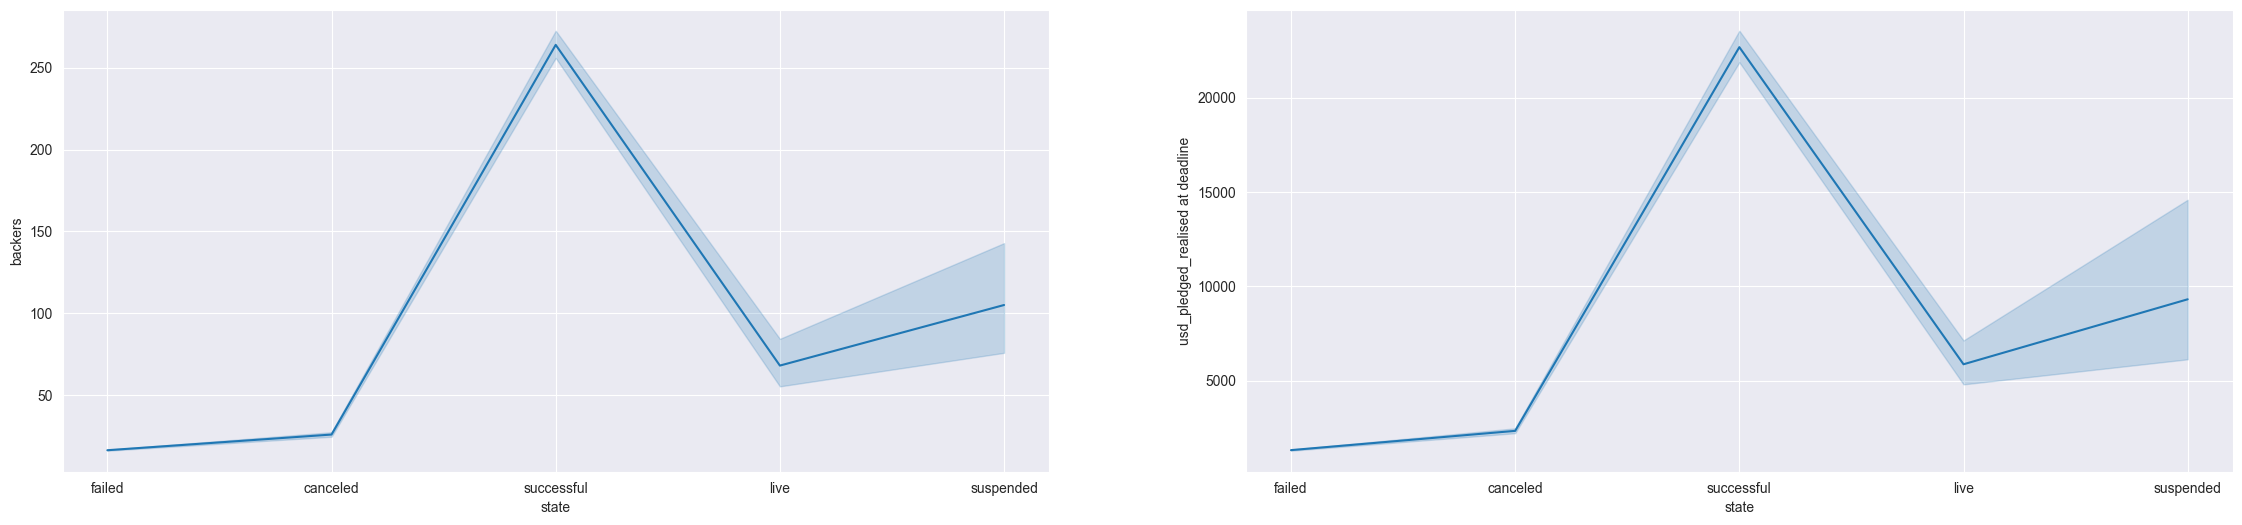

In [102]:
fig = plt.figure(figsize=(28, 6))

ax = fig.add_subplot(121)
sns.lineplot(x='state', y='backers', data=df)  # Bankers

ax = fig.add_subplot(122)
sns.lineplot(x='state', y='usd_pledged_realised at deadline', data=df, ax=ax)  #  Converted by third-party API (pledged)

# From the graph we know...

The overall characteristic of number of `bankers` and `usd_pledged_realised at deadline` are quite similar
**They all reflect the probability of whether a kickstarter project belongs to which class.**

<AxesSubplot: xlabel='state', ylabel='backers'>

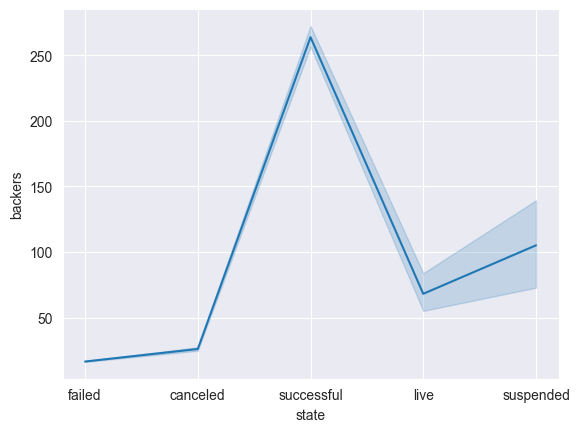

In [103]:
sns.lineplot(x='state', y='backers', data=df)

<AxesSubplot: xlabel='state', ylabel='usd_goal_real_at_start'>

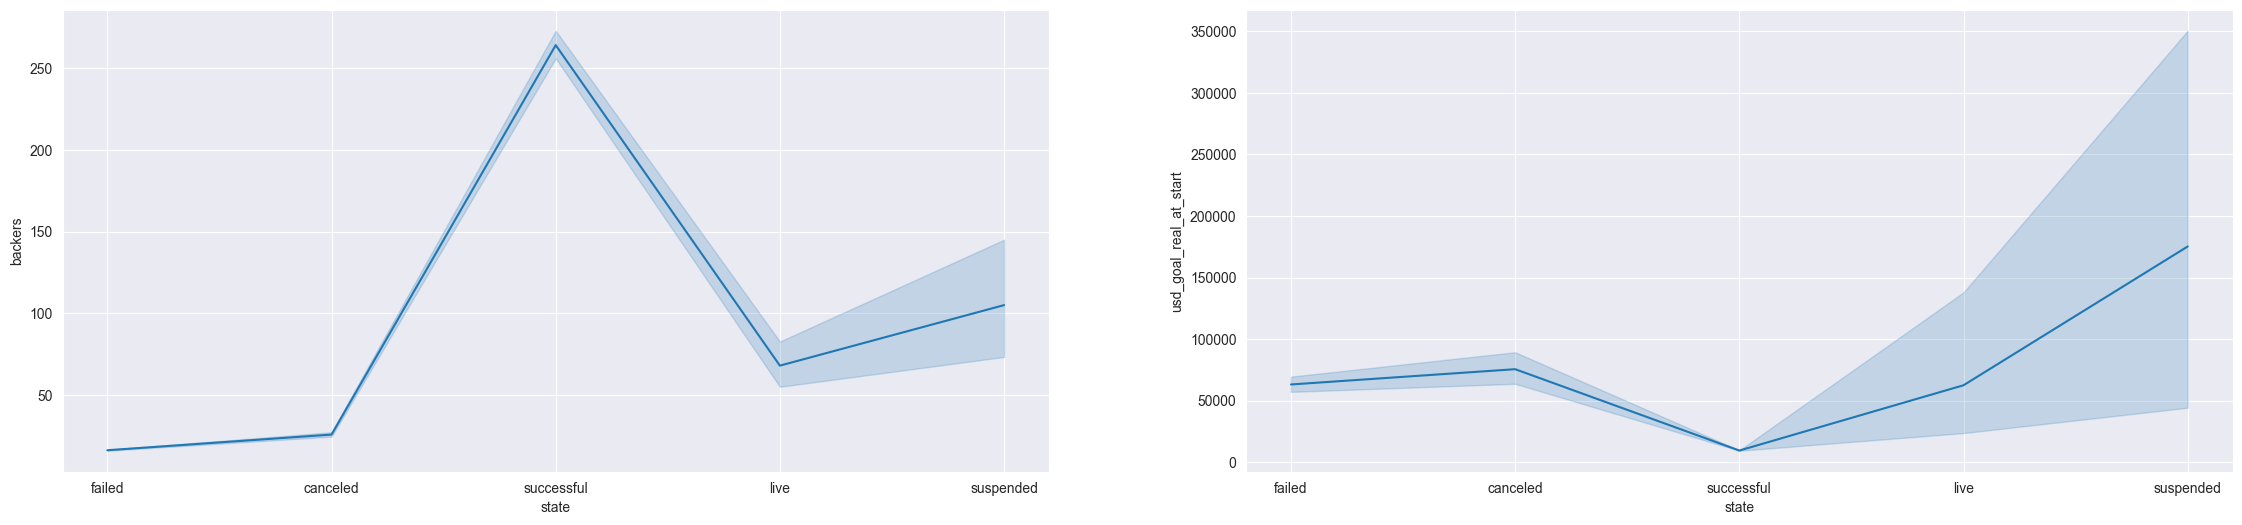

In [104]:
fig = plt.figure(figsize=(28, 6))

ax = fig.add_subplot(121)
sns.lineplot(x='state', y='backers', data=df, ax=ax)

ax = fig.add_subplot(122)
sns.lineplot(x='state', y='usd_goal_real_at_start', data=df, ax=ax)

# Dose `category` or `main_category` have effects on the `state` of a kickstarter project?

Firstly, let's check some basic information.

In [105]:
print(f"We have {len(set(df['main_category']))} unique main_category value.")
print(f"We have {len(set(df['category']))} unique category value.")

We have 15 unique main_category value.
We have 159 unique category value.


# Firstly we take a look at main_category

Data is distributed in these main categories, whereas Film & Video take a majority part in this data.

<AxesSubplot: xlabel='main_category', ylabel='Count'>

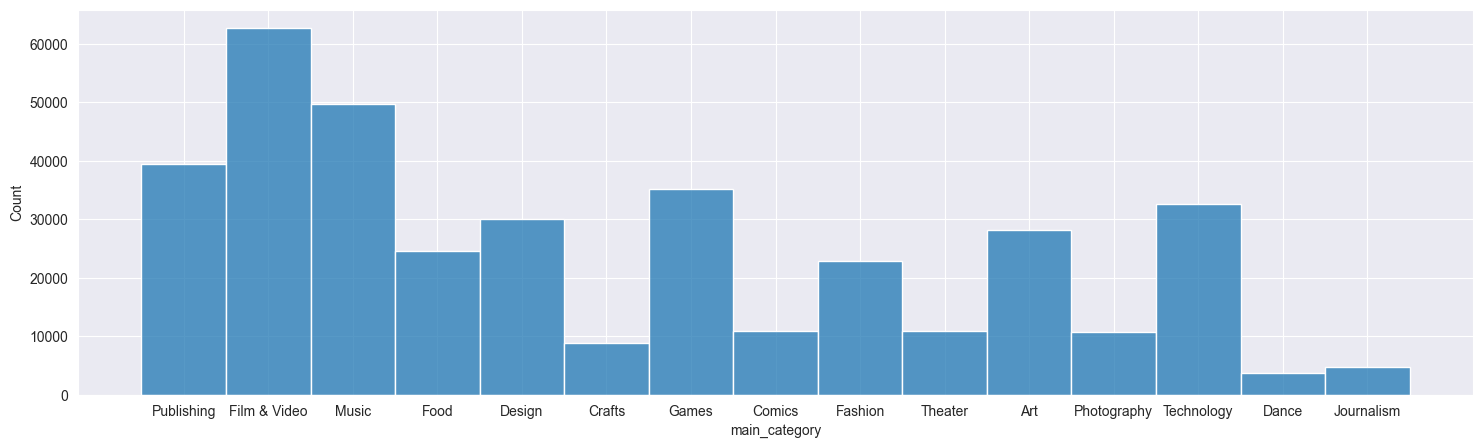

In [106]:
plt.figure(figsize=(18, 5))  #adjust the size of plot
sns.histplot(x='main_category', data=df, bins=20, stat='count', multiple='stack')

# The `main_category` is somewhat related to the state of the kickstarter project to some extent. We need to do further analysis on this.

<AxesSubplot: xlabel='main_category', ylabel='Count'>

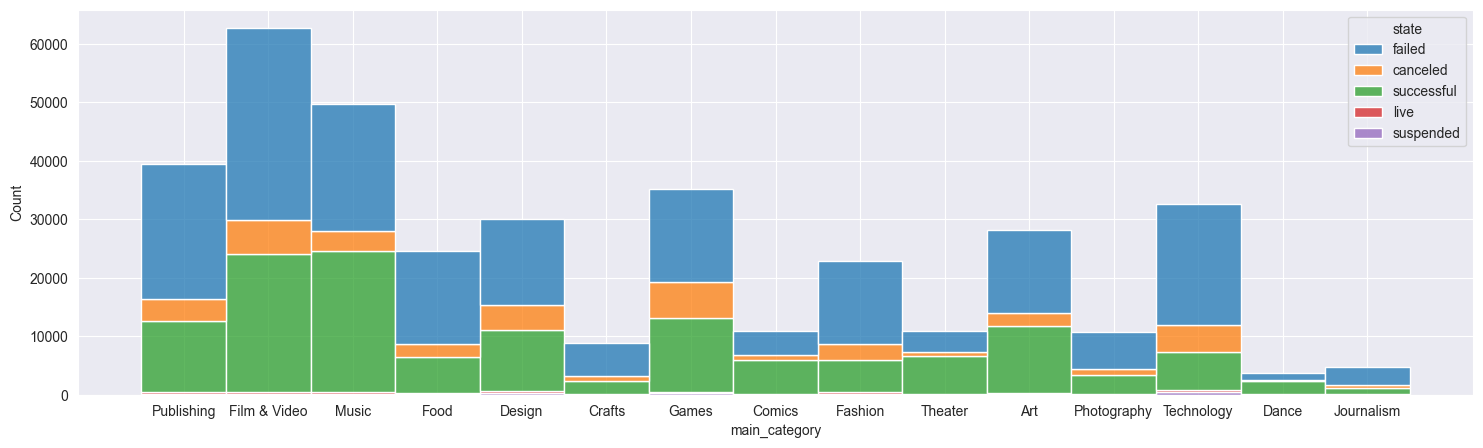

In [107]:
plt.figure(figsize=(18, 5))  #adjust the size of plot
sns.histplot(x='main_category', hue="state", data=df, bins=20, stat='count', multiple='stack')

Let's see to what ratio the state is related to the `main_category`

In [108]:
pd.crosstab(df['main_category'], df['state']).div(pd.crosstab(df['main_category'], df['state']).sum(axis=1), axis=0)

state          canceled    failed      live  successful  suspended
main_category                                                     
Art            0.078926  0.501936  0.006891    0.408837   0.003410
Comics         0.077826  0.373047  0.007025    0.539976   0.002126
Crafts         0.095698  0.647406  0.008628    0.240095   0.008173
Dance          0.043271  0.327847  0.004778    0.620653   0.003451
Design         0.138087  0.492683  0.010144    0.350871   0.008215
Fashion        0.116162  0.621663  0.010959    0.245167   0.006049
Film & Video   0.091741  0.524525  0.005292    0.376576   0.001865
Food           0.089871  0.649094  0.007479    0.247338   0.006219
Games          0.176043  0.454244  0.008146    0.355322   0.006245
Journalism     0.109989  0.659727  0.006519    0.212829   0.010936
Music          0.066520  0.437807  0.005656    0.487018   0.002999
Photography    0.091483  0.592318  0.004454    0.306643   0.005103
Publishing     0.091393  0.587258  0.007587    0.312088   0.001675
Technology     0.144783  0.633053  0.011576    0.197568   0.013020
Theater        0.055718  0.339809  0.003757    0.598790   0.001924

# For a more intuitive form, we can use `heatmap` to display this table.

From the chart below we can know that, `main_category` do have some relation to `state` but it is not very significant.

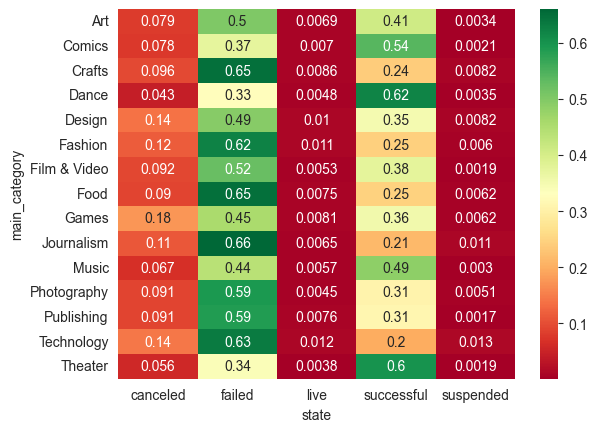

In [109]:
g = sns.heatmap(
    pd.crosstab(df['main_category'], df['state']).div(pd.crosstab(df['main_category'], df['state']).sum(axis=1),
                                                      axis=0), annot=True, cmap="RdYlGn")

# From the heatmap we can also know that.

* Nearly 63% of Music project goes to undefined state.
* 18% Film & Video, 18% Music project succeed.
* ...

# Let's Take a look at the `category` field.

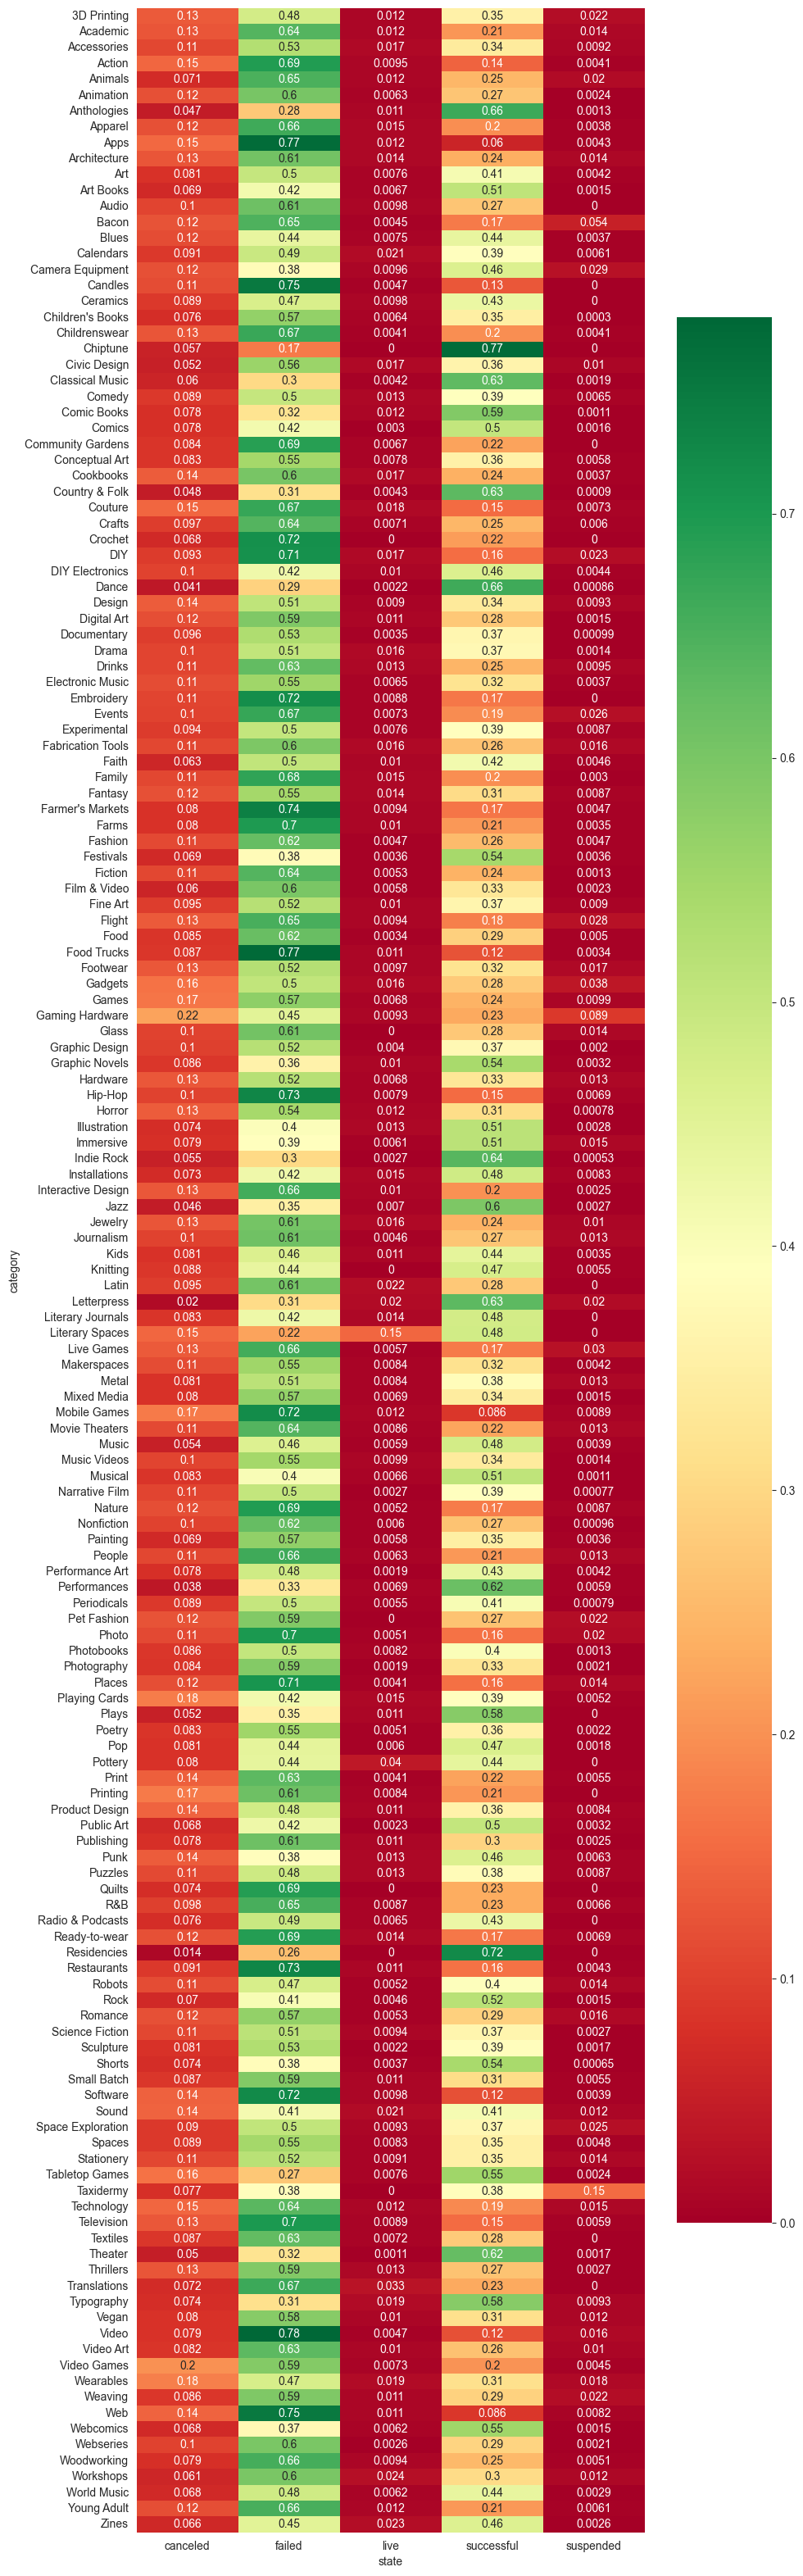

In [110]:
plt.figure(figsize=(10, 40))  #adjust the size of plot
g = sns.heatmap(
    pd.crosstab(df['category'], df['state']).div(pd.crosstab(df['category'], df['state']).sum(axis=1), axis=0),
    annot=True, cmap="RdYlGn")

# From the graph above we know that both `main_category` and `category` have some relation to the state of a project, but they are not a very good factor to determine the state of a project.


# Will the length of `name` related to the `state` of a kickstarter project?

We firstly take a look at the distribution of the project name length.

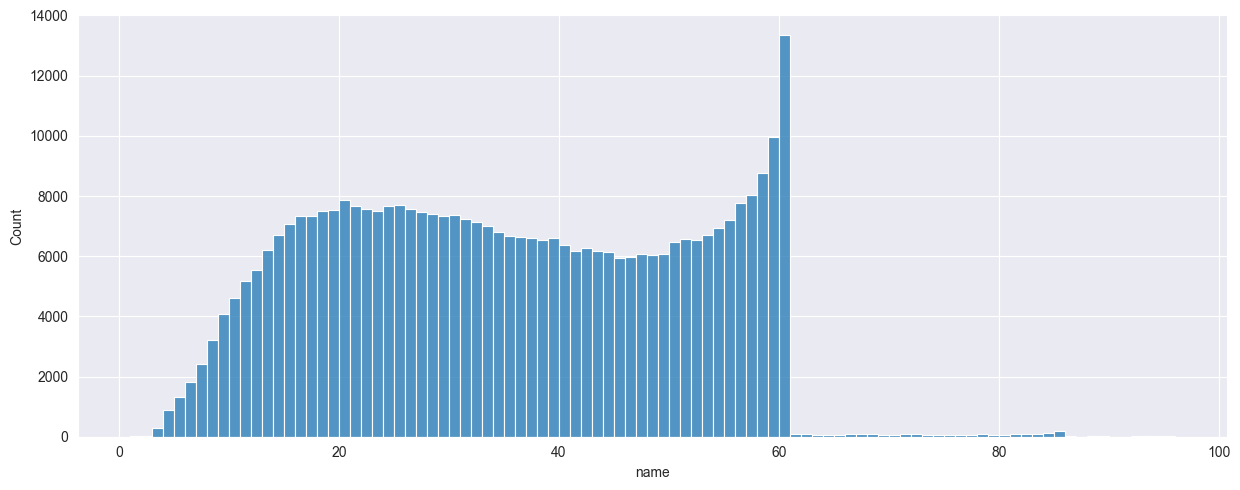

In [111]:
sns.displot(df['name'].apply(lambda x: len(str(x))), binwidth=1, aspect=2.5)

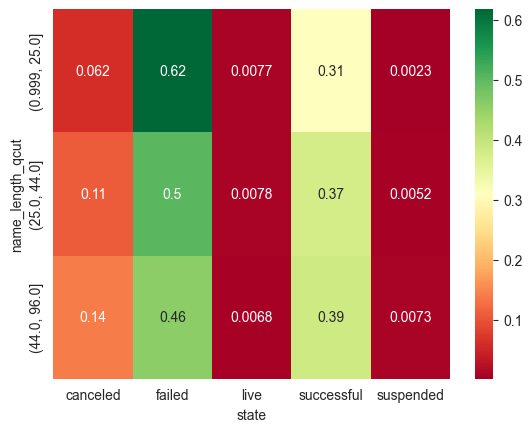

In [112]:
df['name_length'] = df['name'].apply(lambda x: len(str(x)))
df['name_length_qcut'] = pd.qcut(df['name_length'], 3)
g = sns.heatmap(
    pd.crosstab(df['name_length_qcut'], df['state']).div(pd.crosstab(df['name_length_qcut'], df['state']).sum(axis=1),
                                                         axis=0), annot=True, cmap="RdYlGn")

# Here are the things that we found

* If the length of a project's name is too short, then this project is more likely to fail
* As the length of a project's name goes greater, this project is more likely to be canceled.

So, we keep the field `name_length` and `name_length_qcut` and drop `name` field.

In [113]:
df.drop("name", inplace=True, axis=1)

# Dose the currency affects the state of the project?

In [114]:
df['currency'].value_counts()

USD    292795
GBP     33696
EUR     17243
CAD     14761
AUD      7847
SEK      1758
MXN      1752
NZD      1447
DKK      1116
CHF       761
NOK       710
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

We firstly take look at the distribution of the currency type.

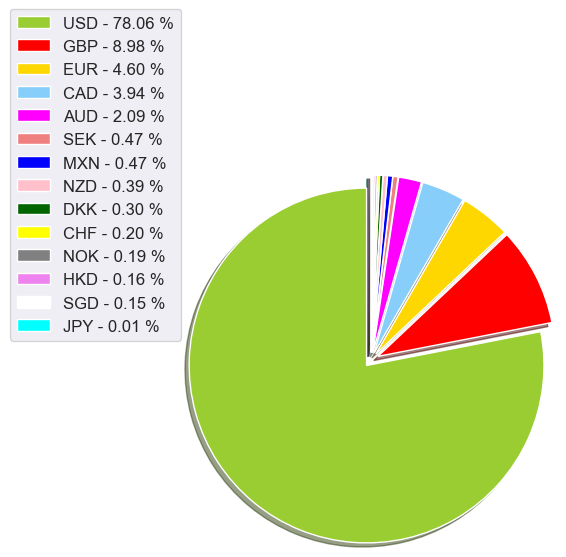

In [115]:
state_value_counts = df['currency'].value_counts()
x = np.char.array([str(i) for i in state_value_counts.index])
y = np.array(state_value_counts.values)
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'magenta', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow',
          'grey', 'violet', 'white', 'cyan'][:len(state_value_counts.index)]
explode = [0.05] * len(state_value_counts.index)
porcent = 100. * y / y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow=True,
                         wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, explode=explode)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, y),
                                         key=lambda x: x[2],
                                         reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.5, 1.),
           fontsize=12)

plt.show()

# We can further confirm this supposition by the graph below. According to the heatmap below, we can conclude that the `currency` column does not have a significant impact on whether a kickstarter project will success or not.

The `currency` field will be dropped later.

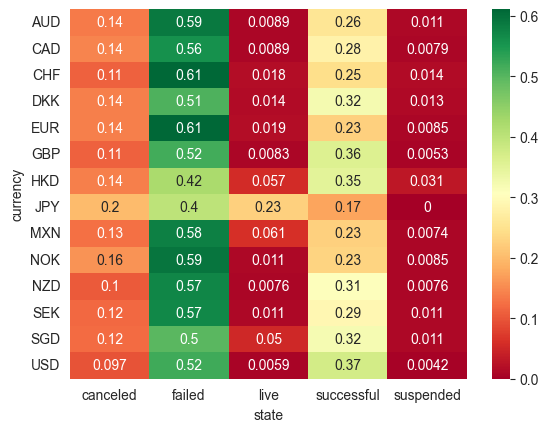

In [116]:
g = sns.heatmap(
    pd.crosstab(df['currency'], df['state']).div(pd.crosstab(df['currency'], df['state']).sum(axis=1), axis=0),
    annot=True, cmap="RdYlGn")

# From the heatmap we know that the currency they use does not have a significant effect on the state of a project

So, we drop currency column.

I will drop this colum later.

# When it comes to date, we add duration field.

* Because, if the duration of a project is long, then this might indicate that the project goes well and are more likely to success.
* However, the duration of a project is short, this might indicate that the project got suspend or canceled.

In [117]:
df["duration"] = (pd.to_datetime(df.deadline, format="%d/%m/%Y") - pd.to_datetime(df.launched,
                                                                                  format="%d/%m/%Y %H:%M")).apply(
    lambda x: x.days)

<AxesSubplot: xlabel='state', ylabel='duration'>

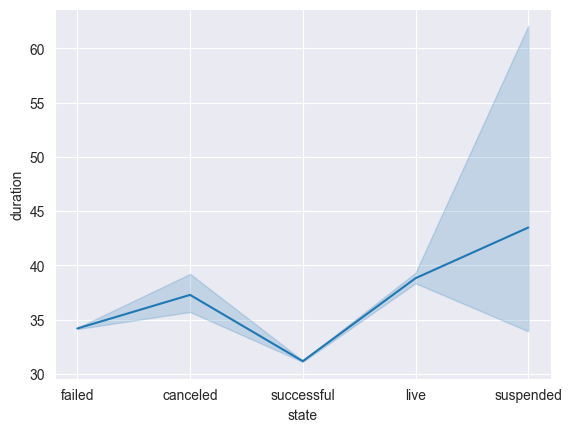

In [118]:
sns.lineplot(x='state', y='duration', data=df)

From the heatmap below we can know that, the duration can be a indicator of whether a project will success or not. But still not a very good factor.

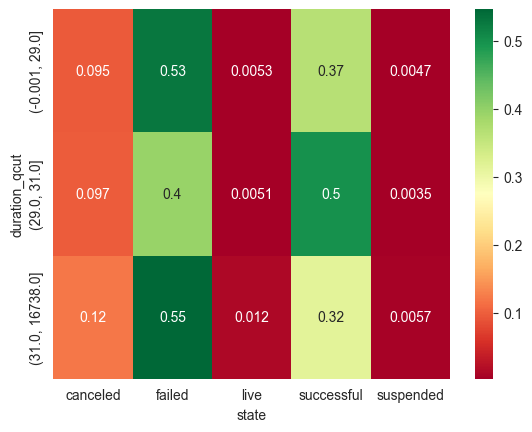

In [119]:
df['duration_qcut'] = pd.qcut(df['duration'], 3)
g = sns.heatmap(
    pd.crosstab(df['duration_qcut'], df['state']).div(pd.crosstab(df['duration_qcut'], df['state']).sum(axis=1),
                                                      axis=0), annot=True, cmap="RdYlGn")

# But From the heatmap we know that...

* If the duration of a project is too short or too long, then this project is more likely failed.


# Dose the start time (morning, afternoon, night) have effects on the `state`?

In [120]:
def TransformTime(datetime):
    hour = pd.to_datetime(datetime).time().hour
    if (0 <= hour <= 7) or (22 <= hour <= 24):
        return "Night"
    elif 7 <= hour <= 12:
        return "AM"
    elif 12 <= hour <= 22:
        return "PM"


df['launched_time'] = df['launched'].apply(TransformTime)

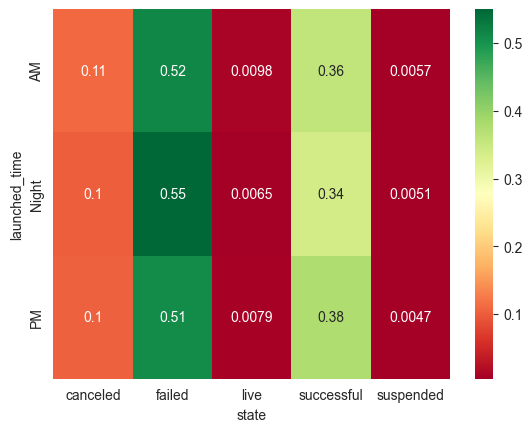

In [121]:
g = sns.heatmap(
    pd.crosstab(df['launched_time'], df['state']).div(pd.crosstab(df['launched_time'], df['state']).sum(axis=1),
                                                      axis=0),
    annot=True, cmap="RdYlGn")

# The day time is not a good indicator of state

In [122]:
df.drop(['launched_time'], axis=1, inplace=True)

# Dose season have effects on the `state` of a project?

In [123]:
def TransformSeason(datetime):
    month = pd.to_datetime(datetime).date().month
    if (11 <= month <= 12) or month == 1:
        return "Winter"
    elif 2 <= month <= 4:
        return "Spring"
    elif 5 <= month <= 7:
        return "Summer"
    elif 8 <= month <= 10:
        return "Autumn"


df['season'] = df['launched'].apply(TransformSeason)

# `season` is also not a good indicator.

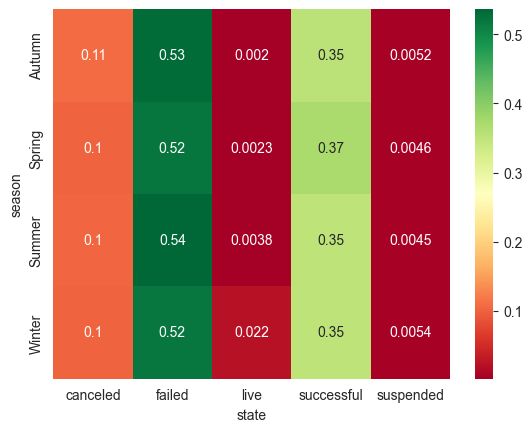

In [124]:
g = sns.heatmap(
    pd.crosstab(df['season'], df['state']).div(pd.crosstab(df['season'], df['state']).sum(axis=1), axis=0),
    annot=True, cmap="RdYlGn")

In [125]:
df.drop(['season'], axis=1, inplace=True)

# After these analysis, Then we can drop `launched` and `deadline` column.

In [126]:
df.drop(['launched', 'deadline'], inplace=True, axis=1)

# Instead of using `usd_pledged_realised at deadline` and `usd_goal_real_at_start` directly, we add a `completeRatio` field.

In [127]:
df["completeRatio"] = df['usd_pledged_realised at deadline'] / df['usd_goal_real_at_start']

# The completeRatio have a interesting cut on `1`.

This is because, if a project is a good one, it is more likely to success, so the ratio will exceed $1$.
However, if a project is not good, then it would be hard for this project to reach the ratio of $1$.

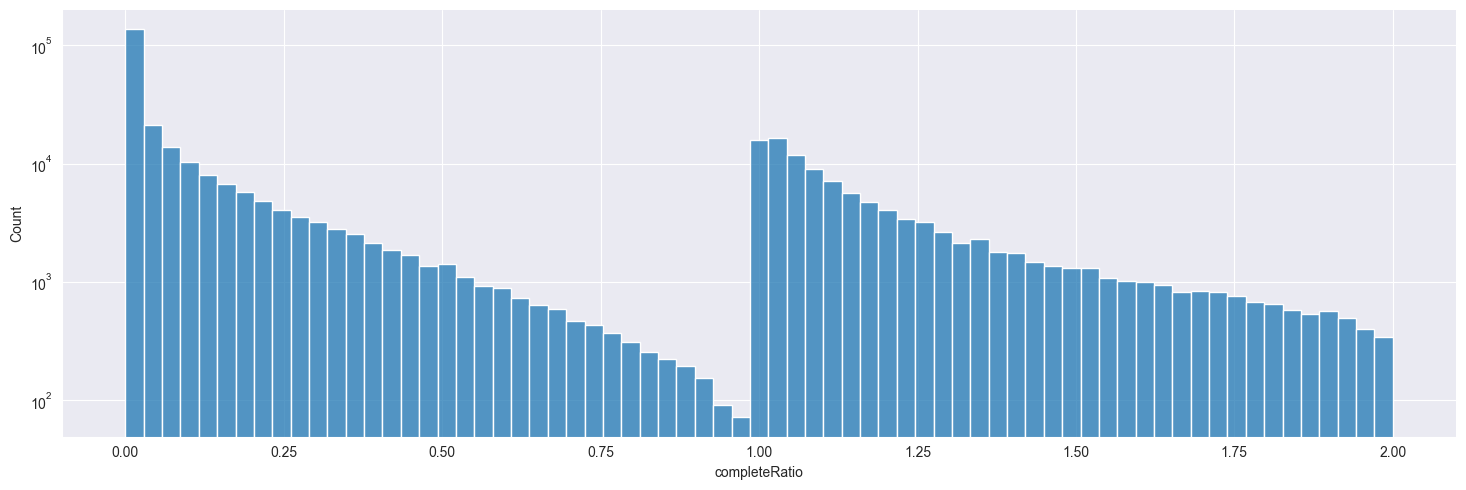

In [128]:
ax = sns.displot(df[df['completeRatio'] < 2]['completeRatio'], aspect=3)
ax.set(yscale="log")

# What if we extend the range of x-axis?

we can see that there are two peaks in this figure, and as the completeRatio goes up, the number of projects goes down.

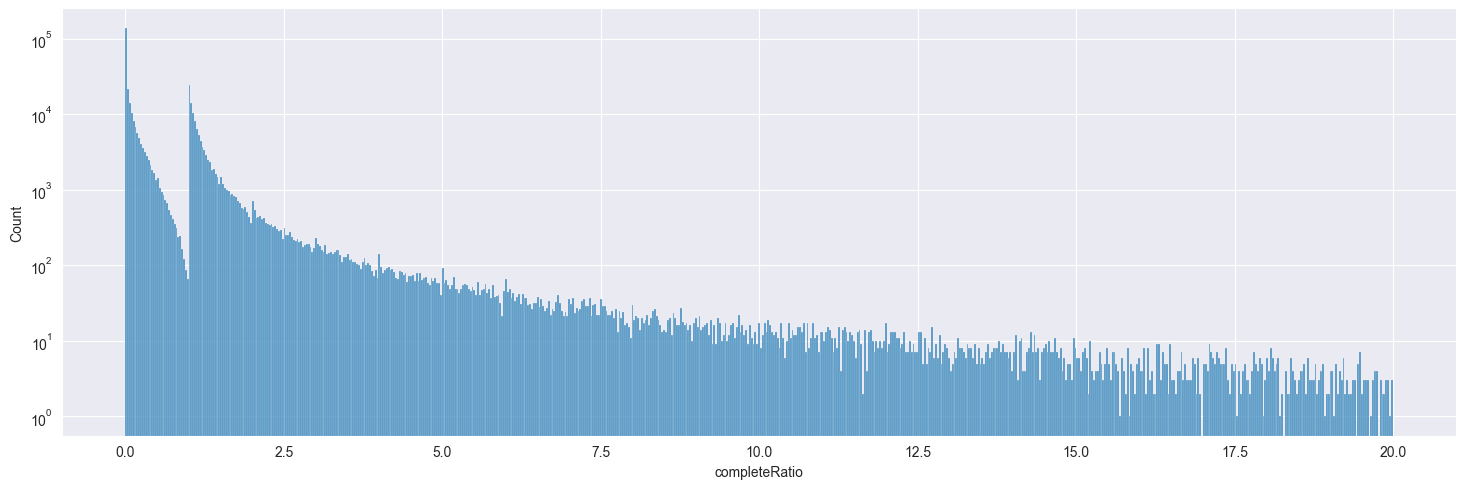

In [129]:
ax = sns.displot(df[df['completeRatio'] < 20]['completeRatio'], aspect=3)
ax.set(yscale="log")

# From the heatmap below we can know that this feature is significantly related to the `state` of the projects.

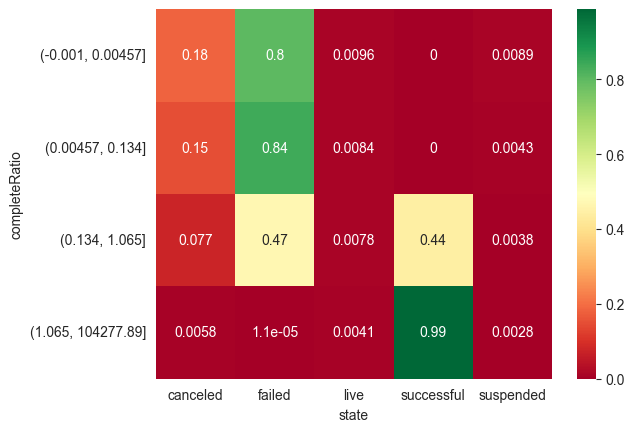

In [130]:
g = sns.heatmap(pd.crosstab(pd.qcut(df['completeRatio'], 4, duplicates='drop'), df['state']).div(
    pd.crosstab(pd.qcut(df['completeRatio'], 4, duplicates='drop'), df['state']).sum(axis=1), axis=0), annot=True,
    cmap="RdYlGn")

# Dose `country` have effects on `state`?

We firstly take a look at the overall distribution of `country`

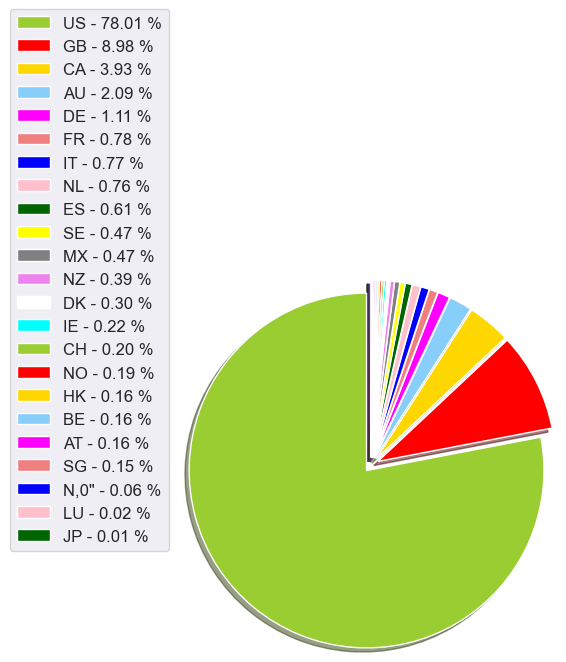

In [131]:
state_value_counts = df['country'].value_counts()
x = np.char.array([str(i) for i in state_value_counts.index])
y = np.array(state_value_counts.values)
colors = ['yellowgreen', 'red', 'gold', 'lightskyblue', 'magenta', 'lightcoral', 'blue', 'pink', 'darkgreen', 'yellow',
          'grey', 'violet', 'white', 'cyan'][:len(state_value_counts.index)]
explode = [0.05] * len(state_value_counts.index)
porcent = 100. * y / y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow=True,
                         wedgeprops={'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, explode=explode)
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy = zip(*sorted(zip(patches, labels, y),
                                         key=lambda x: x[2],
                                         reverse=True))

plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.5, 1.),
           fontsize=12)

plt.show()

# From the heatmap below we can conclude that `country` is not a good feature to determine the state of a project.

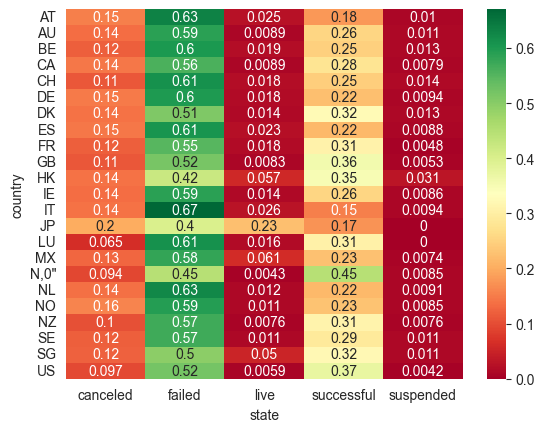

In [132]:
g = sns.heatmap(
    pd.crosstab(df['country'], df['state']).div(pd.crosstab(df['country'], df['state']).sum(axis=1), axis=0),
    annot=True, cmap="RdYlGn")

# Check null values

In [133]:
df.isnull().sum()

ID                                  0
category                            0
main_category                       0
currency                            0
goal                                0
pledged                             0
state                               0
backers                             0
country                             0
usd_pledged_realised at deadline    0
usd_goal_real_at_start              0
name_length                         0
name_length_qcut                    0
duration                            0
duration_qcut                       0
completeRatio                       0
dtype: int64

# The number of null value is very low, so we drop these instances directly.

In [134]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

ID                                  0
category                            0
main_category                       0
currency                            0
goal                                0
pledged                             0
state                               0
backers                             0
country                             0
usd_pledged_realised at deadline    0
usd_goal_real_at_start              0
name_length                         0
name_length_qcut                    0
duration                            0
duration_qcut                       0
completeRatio                       0
dtype: int64

In [135]:
df.head()

ID        category main_category currency     goal  pledged  \
0  1000002330          Poetry    Publishing      GBP   1000.0      0.0   
1  1000003930  Narrative Film  Film & Video      USD  30000.0   2421.0   
2  1000004038  Narrative Film  Film & Video      USD  45000.0    220.0   
3  1000007540           Music         Music      USD   5000.0      1.0   
4  1000011046    Film & Video  Film & Video      USD  19500.0   1283.0   

      state  backers country  usd_pledged_realised at deadline  \
0    failed        0      GB                               0.0   
1    failed       15      US                            2421.0   
2    failed        3      US                             220.0   
3    failed        1      US                               1.0   
4  canceled       14      US                            1283.0   

   usd_goal_real_at_start  name_length name_length_qcut  duration  \
0                 1533.95           31     (25.0, 44.0]        58   
1                30000.00           45     (44.0, 96.0]        59   
2                45000.00           14    (0.999, 25.0]        44   
3                 5000.00           49     (44.0, 96.0]        29   
4                19500.00           58     (44.0, 96.0]        55   

     duration_qcut  completeRatio  
0  (31.0, 16738.0]       0.000000  
1  (31.0, 16738.0]       0.080700  
2  (31.0, 16738.0]       0.004889  
3   (-0.001, 29.0]       0.000200  
4  (31.0, 16738.0]       0.065795

# Feature Selection
## Before actually take the data to the models, lets further select the feature using algorithm based methods.

In [136]:
df.head()

ID        category main_category currency     goal  pledged  \
0  1000002330          Poetry    Publishing      GBP   1000.0      0.0   
1  1000003930  Narrative Film  Film & Video      USD  30000.0   2421.0   
2  1000004038  Narrative Film  Film & Video      USD  45000.0    220.0   
3  1000007540           Music         Music      USD   5000.0      1.0   
4  1000011046    Film & Video  Film & Video      USD  19500.0   1283.0   

      state  backers country  usd_pledged_realised at deadline  \
0    failed        0      GB                               0.0   
1    failed       15      US                            2421.0   
2    failed        3      US                             220.0   
3    failed        1      US                               1.0   
4  canceled       14      US                            1283.0   

   usd_goal_real_at_start  name_length name_length_qcut  duration  \
0                 1533.95           31     (25.0, 44.0]        58   
1                30000.00           45     (44.0, 96.0]        59   
2                45000.00           14    (0.999, 25.0]        44   
3                 5000.00           49     (44.0, 96.0]        29   
4                19500.00           58     (44.0, 96.0]        55   

     duration_qcut  completeRatio  
0  (31.0, 16738.0]       0.000000  
1  (31.0, 16738.0]       0.080700  
2  (31.0, 16738.0]       0.004889  
3   (-0.001, 29.0]       0.000200  
4  (31.0, 16738.0]       0.065795

# Transform Category

To use categorical features, we need to transform the string category to numeric values.

In [137]:
def getTransformTable(colName, data):
    TransformTableData = {}
    stateSetData = set(data[colName])
    for index, i in enumerate(stateSetData):
        TransformTableData[i] = index
    return TransformTableData


backers_qcut = pd.qcut(df['backers'], 3)
usd_pledged_realised_at_deadline_qcut = pd.qcut(df['usd_pledged_realised at deadline'], 3)
usd_goal_real_at_start_qcut = pd.qcut(df['usd_goal_real_at_start'], 3)
completeRatio_qcut = pd.qcut(df['completeRatio'], 3)
categoricalDf = pd.concat(
    [
        backers_qcut,
        usd_pledged_realised_at_deadline_qcut,
        usd_goal_real_at_start_qcut,
        completeRatio_qcut]
    , axis=1)

categoricalDf.head()
num_encode = {
    'backers': getTransformTable('backers', categoricalDf),
    'usd_pledged_realised at deadline': getTransformTable('usd_pledged_realised at deadline', categoricalDf),
    'usd_goal_real_at_start': getTransformTable('usd_goal_real_at_start', categoricalDf),
    'completeRatio': getTransformTable('completeRatio', categoricalDf)
}

# Do Transformation
categoricalDf.replace(num_encode, inplace=True)
categoricalDf.head()

num_encode = {
    'category': getTransformTable('category', df),
    'state': getTransformTable('state', df),
    'main_category': getTransformTable('main_category', df),
    'currency': getTransformTable('currency', df),
    'country': getTransformTable('country', df),
    'name_length_qcut': getTransformTable('name_length_qcut', df),
    'duration_qcut': getTransformTable('duration_qcut', df)
}

# Do Transformation
df.replace(num_encode, inplace=True)

In [138]:
df.head()

ID  category  main_category  currency     goal  pledged  state  \
0  1000002330        78              9         5   1000.0      0.0      1   
1  1000003930       154              3        11  30000.0   2421.0      1   
2  1000004038       154              3        11  45000.0    220.0      1   
3  1000007540        32             12        11   5000.0      1.0      1   
4  1000011046        28              3        11  19500.0   1283.0      4   

   backers  country  usd_pledged_realised at deadline  usd_goal_real_at_start  \
0        0       21                               0.0                 1533.95   
1       15       19                            2421.0                30000.00   
2        3       19                             220.0                45000.00   
3        1       19                               1.0                 5000.00   
4       14       19                            1283.0                19500.00   

   name_length name_length_qcut  duration duration_qcut  completeRatio  
0           31                1        58             0       0.000000  
1           45                0        59             0       0.080700  
2           14                2        44             0       0.004889  
3           49                0        29             1       0.000200  
4           58                0        55             0       0.065795

# Normalize data

In [139]:
continueiousFeatures = pd.concat([df[['goal', 'pledged', 'backers', 'usd_pledged_realised at deadline',
                                      'usd_goal_real_at_start', 'name_length', 'duration', 'completeRatio']]], axis=1)
categoricalFeatures = pd.concat(
    [df[['category', 'main_category', 'currency', 'country', 'name_length_qcut', 'duration_qcut']], categoricalDf],
    axis=1)
targetFeature = df['state']

In [140]:
continueiousFeatures.head()

goal  pledged  backers  usd_pledged_realised at deadline  \
0   1000.0      0.0        0                               0.0   
1  30000.0   2421.0       15                            2421.0   
2  45000.0    220.0        3                             220.0   
3   5000.0      1.0        1                               1.0   
4  19500.0   1283.0       14                            1283.0   

   usd_goal_real_at_start  name_length  duration  completeRatio  
0                 1533.95           31        58       0.000000  
1                30000.00           45        59       0.080700  
2                45000.00           14        44       0.004889  
3                 5000.00           49        29       0.000200  
4                19500.00           58        55       0.065795

In [141]:
categoricalFeatures.head()

category  main_category  currency  country name_length_qcut duration_qcut  \
0        78              9         5       21                1             0   
1       154              3        11       19                0             0   
2       154              3        11       19                2             0   
3        32             12        11       19                0             1   
4        28              3        11       19                0             0   

  backers usd_pledged_realised at deadline usd_goal_real_at_start  \
0       1                                0                      0   
1       0                                1                      2   
2       1                                2                      2   
3       1                                0                      1   
4       0                                2                      2   

  completeRatio  
0             2  
1             1  
2             2  
3             2  
4             1

In [142]:
targetFeature.head()

0    1
1    1
2    1
3    1
4    4
Name: state, dtype: int64

Instead of using `MinMaxScaler`, here we use `RobustScaler` to solve the problem of outlines.

Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

In [143]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# scaler = MinMaxScaler()
scaler = RobustScaler()  # use RobustScaler to solve the problem of outlines.

normalized_df = pd.DataFrame(scaler.fit_transform(continueiousFeatures), columns=continueiousFeatures.columns,
                             index=continueiousFeatures.index)
normalized_df.head()

continueiousFeatures = normalized_df

# Perform Univariate selection - Select Continuous Features

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator

In [144]:
from sklearn.feature_selection import SelectKBest, f_classif

data = continueiousFeatures
target = targetFeature

In [145]:
data.head()

goal   pledged   backers  usd_pledged_realised at deadline  \
0 -0.310345 -0.153124 -0.218182                         -0.155504   
1  1.689655  0.444801  0.054545                          0.446857   
2  2.724138 -0.098790 -0.163636                         -0.100767   
3 -0.034483 -0.152877 -0.200000                         -0.155256   
4  0.965517  0.163744  0.036364                          0.163715   

   usd_goal_real_at_start  name_length  duration  completeRatio  
0               -0.283289    -0.107143  4.142857      -0.126617  
1                1.750000     0.392857  4.285714      -0.050533  
2                2.821429    -0.714286  2.142857      -0.122008  
3               -0.035714     0.535714  0.000000      -0.126428  
4                1.000000     0.857143  3.714286      -0.064586

In [146]:
best_features = SelectKBest(score_func=f_classif, k=6).fit(data, target)

dfscores = pd.DataFrame(best_features.scores_)
dfcolumns = pd.DataFrame(data.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns

print(featureScores.nlargest(10, 'Score'))

                              Specs        Score
5                       name_length  2233.528278
2                           backers  1585.096209
1                           pledged  1185.680766
3  usd_pledged_realised at deadline  1164.494796
6                          duration    93.529105
0                              goal    63.112829
4            usd_goal_real_at_start    56.290617
7                     completeRatio    20.549446


# Tree-based feature selection - Select Continuous Features

A meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished


<AxesSubplot: >

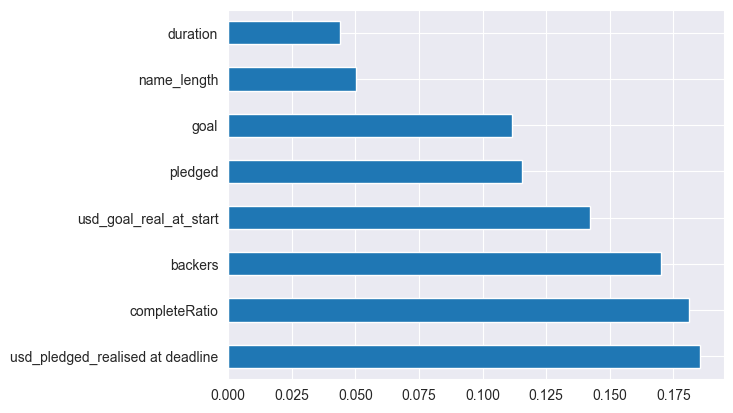

In [147]:
from sklearn.ensemble import ExtraTreesClassifier

tree = ExtraTreesClassifier(verbose=True, n_jobs=-1)
tree.fit(data, target)

df_feature_importances = pd.Series(tree.feature_importances_, index=data.columns)
df_feature_importances.nlargest(10).plot(kind='barh')

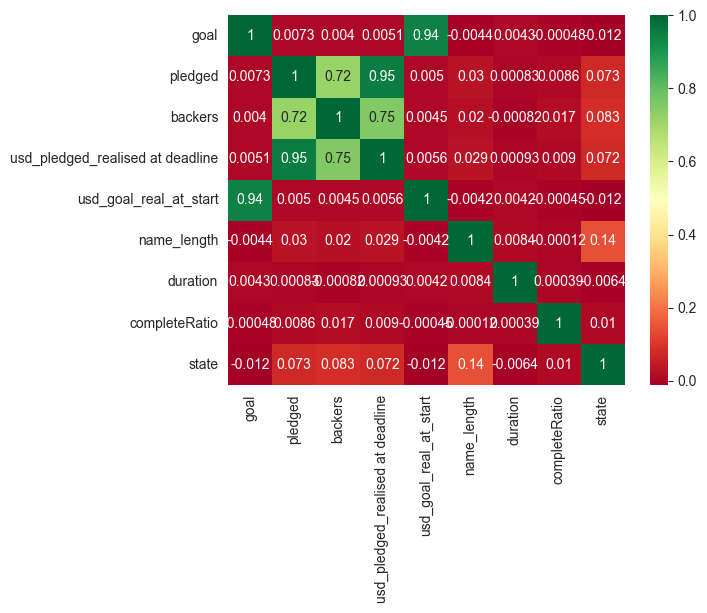

In [148]:
combine = pd.concat([data, target], axis=1)
corr_mat = combine.corr()

# plt.figure(figsize=(20,20))
g = sns.heatmap(corr_mat, annot=True, cmap="RdYlGn")

# Drop features - Continuous Features

According to computer based selection and the figures/graphs above, we drop the following features.
* `usd pledged` (has been dropped earlier)
* `launched` (has been dropped earlier)
* `deadline` (has been dropped earlier)
* `goal`

In [149]:
continueiousFeatures.drop(['goal'], axis=1, inplace=True)

# Perform Univariate selection - Select Categorical Features

Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator

In [150]:
from sklearn.feature_selection import SelectKBest, f_classif

data = categoricalFeatures
target = targetFeature

best_features = SelectKBest(score_func=f_classif, k=6).fit(data, target)

dfscores = pd.DataFrame(best_features.scores_)
dfcolumns = pd.DataFrame(data.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns

print(featureScores.nlargest(10, 'Score'))

                              Specs          Score
9                     completeRatio  231261.456772
6                           backers   20922.134859
7  usd_pledged_realised at deadline    6166.629332
8            usd_goal_real_at_start    4515.725256
4                  name_length_qcut    2048.940112
5                     duration_qcut     702.203463
3                           country     454.279259
2                          currency     266.402858
1                     main_category     159.142590
0                          category       6.258669


# Tree-based feature selection - Select Categorical Features

A meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished


<AxesSubplot: >

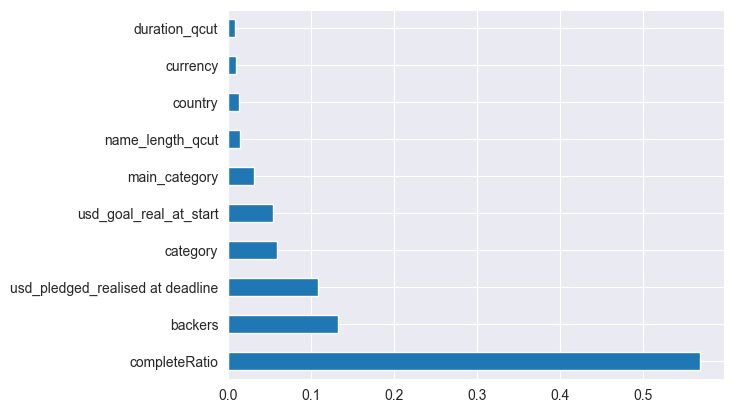

In [151]:
from sklearn.ensemble import ExtraTreesClassifier

tree = ExtraTreesClassifier(verbose=True, n_jobs=-1)
tree.fit(data, target)

df_feature_importances = pd.Series(tree.feature_importances_, index=data.columns)
df_feature_importances.nlargest(10).plot(kind='barh')

# Mutual information (MI) - Select Categorical Features

* Estimate mutual information for a discrete target variable.
* Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [152]:
from sklearn.feature_selection import mutual_info_classif

data = mutual_info_classif(categoricalFeatures, targetFeature)

In [153]:
for i in range(len(data)):
    print(categoricalFeatures.columns[i], list(data)[i])

category 0.055357346243650296
main_category 0.030808440072791266
currency 0.029513908605380834
country 0.03442026107703988
name_length_qcut 0.028003733684887067
duration_qcut 0.020590539364214955
backers 0.28491064040758984
usd_pledged_realised at deadline 0.26685378386083247
usd_goal_real_at_start 0.03773784833949634
completeRatio 0.5674784522288094


# Drop features - Categorical Features

According to computer based selection and the figures/graphs above, we drop the following features.
* `usd_goal_real_at_start`
* `category`
* `country`
* `currency`
* `duration_qcut`
* `main_category`
* `name_length_qcut`

In [154]:
categoricalFeatures.drop(
    ['usd_goal_real_at_start', 'category', 'country', 'currency', 'main_category', 'duration_qcut', 'name_length_qcut'],
    inplace=True, axis=1)

# Summary

The following features will be taken to the model and will be used in the following sections.

In [155]:
continueiousFeatures.head()

pledged   backers  usd_pledged_realised at deadline  \
0 -0.153124 -0.218182                         -0.155504   
1  0.444801  0.054545                          0.446857   
2 -0.098790 -0.163636                         -0.100767   
3 -0.152877 -0.200000                         -0.155256   
4  0.163744  0.036364                          0.163715   

   usd_goal_real_at_start  name_length  duration  completeRatio  
0               -0.283289    -0.107143  4.142857      -0.126617  
1                1.750000     0.392857  4.285714      -0.050533  
2                2.821429    -0.714286  2.142857      -0.122008  
3               -0.035714     0.535714  0.000000      -0.126428  
4                1.000000     0.857143  3.714286      -0.064586

In [156]:
categoricalFeatures.head()

backers usd_pledged_realised at deadline completeRatio
0       1                                0             2
1       0                                1             1
2       1                                2             2
3       1                                0             2
4       0                                2             1

# One-hot vector conversion

In order to calculate the **distance** correctly, we need to transform the categorical features to one-hot vectors.

In [157]:
onehot_df = pd.get_dummies(categoricalFeatures, prefix=categoricalFeatures.columns, columns=categoricalFeatures.columns,
                           drop_first=True)
onehot_df.head()

backers_0  backers_2  usd_pledged_realised at deadline_2  \
0          0          0                                   0   
1          1          0                                   0   
2          0          0                                   1   
3          0          0                                   0   
4          1          0                                   1   

   usd_pledged_realised at deadline_1  completeRatio_1  completeRatio_0  
0                                   0                0                0  
1                                   1                1                0  
2                                   0                0                0  
3                                   0                0                0  
4                                   0                1                0

# Variables to store the best model (will be used to draw ROC curve)

In [158]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

BestModels = {
    KNeighborsClassifier.__name__: {
        'accuracy': 0,
        'model': None
    },
    RandomForestClassifier.__name__: {
        'accuracy': 0,
        'model': None
    },
    DecisionTreeClassifier.__name__: {
        'accuracy': 0,
        'model': None
    },
    GaussianNB.__name__: {
        'accuracy': 0,
        'model': None
    },
    LogisticRegression.__name__: {
        'accuracy': 0,
        'model': None
    },
    VotingClassifier.__name__: {
        'accuracy': 0,
        'model': None
    },
    BaggingClassifier.__name__: {
        'accuracy': 0,
        'model': None
    },
    GradientBoostingClassifier.__name__: {
        'accuracy': 0,
        'model': None
    }

}


def updateBest(model, accuracyData):
    if accuracyData > BestModels[model.__class__.__name__]['accuracy']:
        BestModels[model.__class__.__name__]['model'] = model
        BestModels[model.__class__.__name__]['accuracy'] = accuracyData

# Prepare Training Data

In [159]:
class Data:
    X = None
    Y = None
    X_train = None
    X_train_val = None
    X_test = None
    X_val = None
    Y_train = None
    Y_train_val = None
    Y_test = None
    Y_val = None


data = Data()

data.X, data.Y = pd.concat([continueiousFeatures, onehot_df], axis=1), pd.concat([targetFeature], axis=1)
train_val, test = train_test_split(pd.concat([continueiousFeatures, onehot_df, targetFeature], axis=1),
                                   test_size=0.2)
data.X_train_val, data.Y_train_val = train_val.drop(["state"], axis=1), train_val['state']

train, val = train_test_split(train_val, test_size=0.2)
data.X_train, data.X_test, data.X_val = train.drop(["state"], axis=1), test.drop(["state"], axis=1), val.drop(["state"],
                                                                                                              axis=1)
data.Y_train, data.Y_test, data.Y_val = train['state'], test['state'], val['state']

In [160]:
categoricalData = Data()

train_val, test = train_test_split(pd.concat([categoricalFeatures, targetFeature], axis=1),
                                   test_size=0.2)
categoricalData.X_train_val, categoricalData.Y_train_val = train_val.drop(["state"], axis=1), train_val['state']

train, val = train_test_split(train_val, test_size=0.2)
categoricalData.X_train, categoricalData.X_test, categoricalData.X_val = train.drop(["state"], axis=1), test.drop(
    ["state"], axis=1), val.drop(["state"], axis=1)
categoricalData.Y_train, categoricalData.Y_test, categoricalData.Y_val = train['state'], test['state'], val['state']

# KNeighborsClassifier

# How dose the K setting affect the accuracy and f1 score?

As the number of neighbors increases the accuracy also increased, but the F1 score starts to dcrease.

This is because,

$$
F_1 = \frac{precision \times recall}{precision + recall}
$$

As the number of neighbors increase, the precision is also increasing. However, recall starts to drop. Which leads to the decrease of F1 score.

$$
F_1 = \frac{precision \uparrow \times recall \downarrow}{precision \uparrow + recall \downarrow} \downarrow
$$


current K : 1  acc: 0.8123000533191149 F1: 0.4124491013705504 | 
current K : 2  acc: 0.853855638496401 F1: 0.39761851312916563 | 
current K : 3  acc: 0.8470907757931219 F1: 0.4064395738635655 | 
current K : 4  acc: 0.8694681418288457 F1: 0.3926768501013759 | 
current K : 5  acc: 0.8628032524660091 F1: 0.3957486233102803 | 
current K : 6  acc: 0.8726672887230073 F1: 0.3879853126852553 | 
current K : 7  acc: 0.869518128499067 F1: 0.3925341492953338 | 
current K : 8  acc: 0.8745001332977873 F1: 0.38668439842766994 | 
current K : 9  acc: 0.8724340175953079 F1: 0.3881263865918175 | 
current K : 10  acc: 0.8752999200213276 F1: 0.38461673494132603 | 
current K : 11  acc: 0.8736003732338044 F1: 0.3851496655988723 | 
current K : 12  acc: 0.8759997334044255 F1: 0.38172716199175516 | 
current K : 13  acc: 0.8753165822447347 F1: 0.3826676129465153 | 
current K : 14  acc: 0.8763829645427886 F1: 0.3801791837287074 | 
current K : 15  acc: 0.876266328978939 F1: 0.38125531513586786 | 
current K : 16  a

Text(0, 0.5, 'F1')

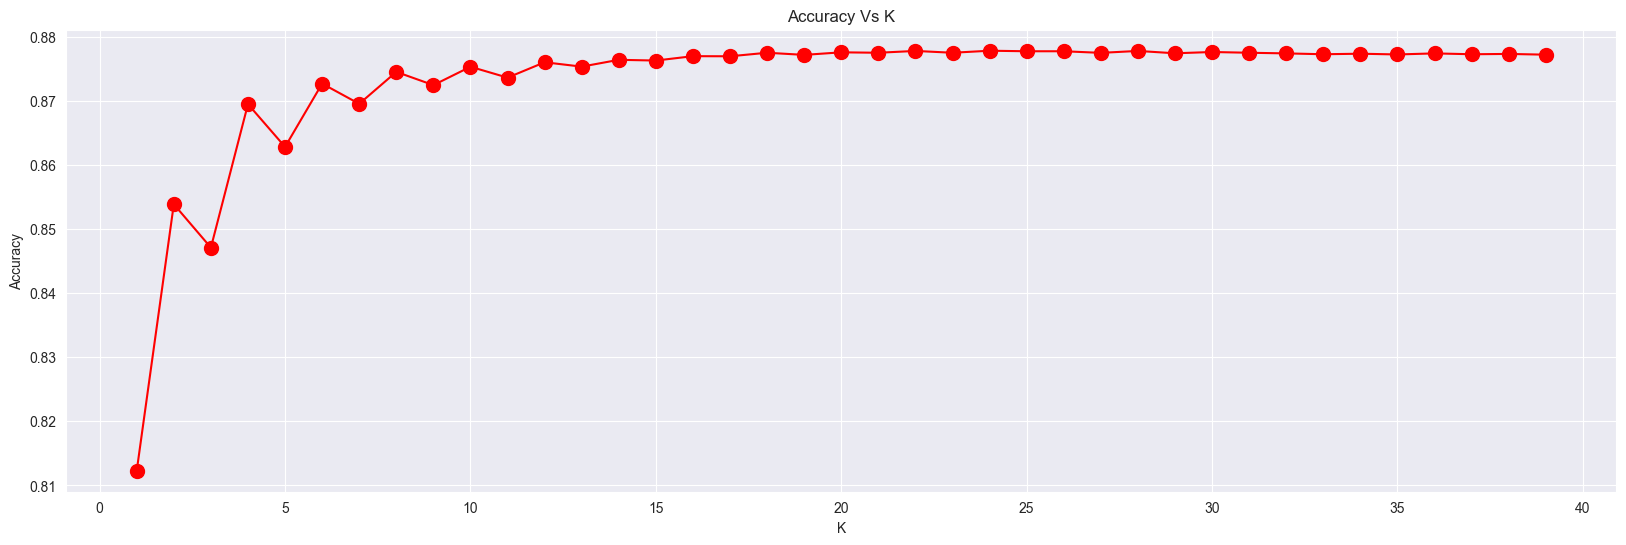

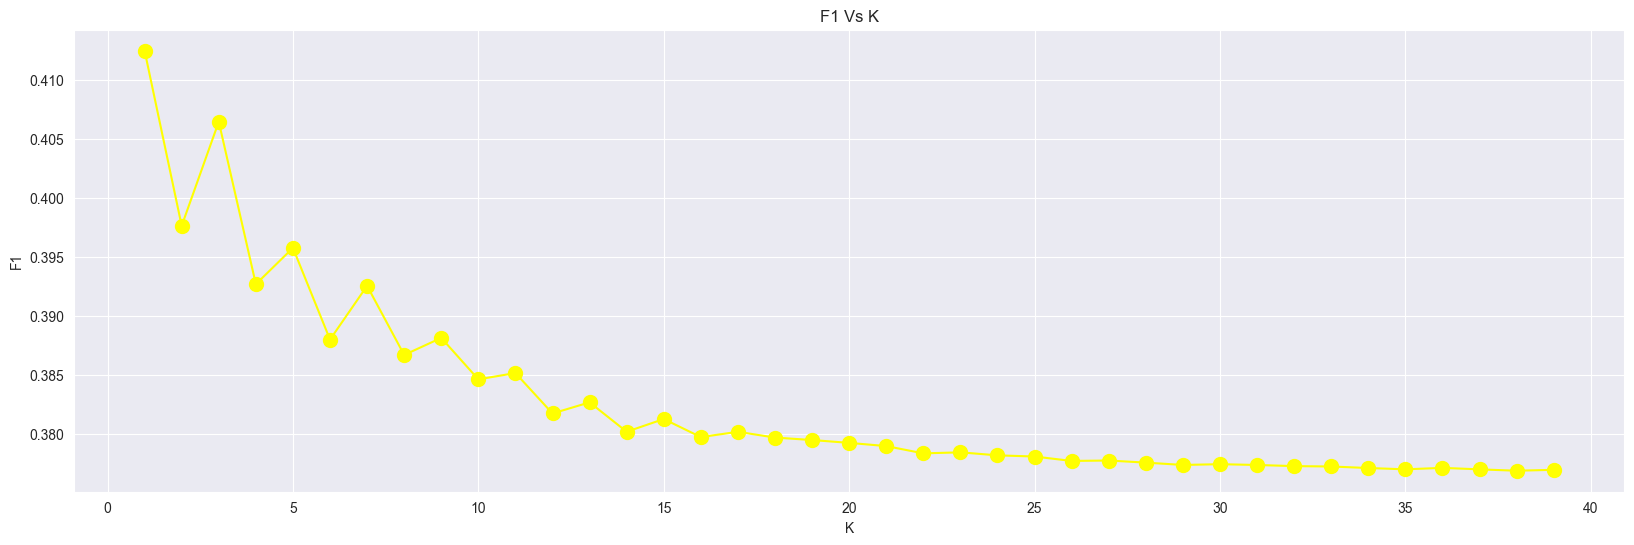

In [161]:
accuracy = []
f1_scores = []
x_values = list(range(1, 40))
# Calculating error for K values between 1 and 60
for i in x_values:
    print(f"current K : {i} ", end=" ")
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)  # 3 jobs will not use all the cores of my computer
    knn.fit(data.X_train, data.Y_train)
    pred_i = knn.predict(data.X_val)
    acc = metrics.accuracy_score(data.Y_val, pred_i)
    f1 = f1_score(y_true=data.Y_val, y_pred=pred_i, average="macro")
    print(f"acc: {acc} F1: {f1} | ")
    accuracy.append(acc)
    f1_scores.append(f1)

plt.figure(figsize=(20, 6))
plt.plot(x_values, accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.figure(figsize=(20, 6))
plt.plot(x_values, f1_scores, color='yellow', marker='o',
         markersize=10)
plt.title('F1 Vs K')
plt.xlabel('K')
plt.ylabel('F1')

# What if we change the ratio of Test set and Train set? / How dose the split affects the result?

From the graph below we can know that, if the test set is too large (ratio is too high), the model will **not be able to have enough instance to compare with**, which will leads to a drop in both $accuracy$ and $percision$.

current test_size : 0.1  acc: 0.8697014129565449 F1: 0.39224492450241066 | 
current test_size : 0.2  acc: 0.8703512396694215 F1: 0.39313648368754045 | 
current test_size : 0.3  acc: 0.8705789567226517 F1: 0.3941954521529657 | 
current test_size : 0.4  acc: 0.8720424553452413 F1: 0.39401362944197343 | 
current test_size : 0.5  acc: 0.8711410290589177 F1: 0.3921435989887007 | 
current test_size : 0.6  acc: 0.8701624011374745 F1: 0.39251802242774925 | 
current test_size : 0.7  acc: 0.869477663099364 F1: 0.39161116271629404 | 
current test_size : 0.8  acc: 0.8693098507064783 F1: 0.3900585223371625 | 
current test_size : 0.9  acc: 0.8680648123463373 F1: 0.3869030247727891 | 
current test_size : 0.95  acc: 0.8636188244538299 F1: 0.3865432999000634 | 
current test_size : 0.98  acc: 0.8576704139718034 F1: 0.3837776410680913 | 
current test_size : 0.99  acc: 0.85426435392606 F1: 0.38325832916158853 | 
current test_size : 0.999  acc: 0.8402756697433776 F1: 0.3640682917436011 | 
current test_size

Text(0, 0.5, 'F1')

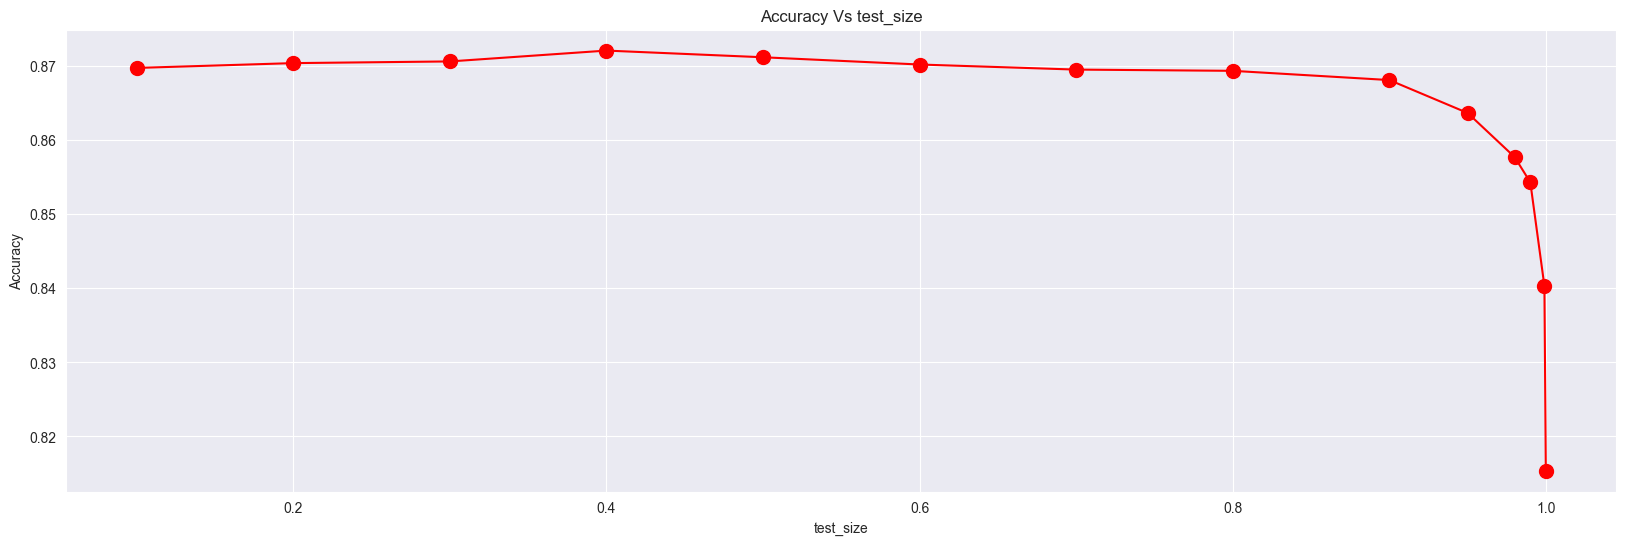

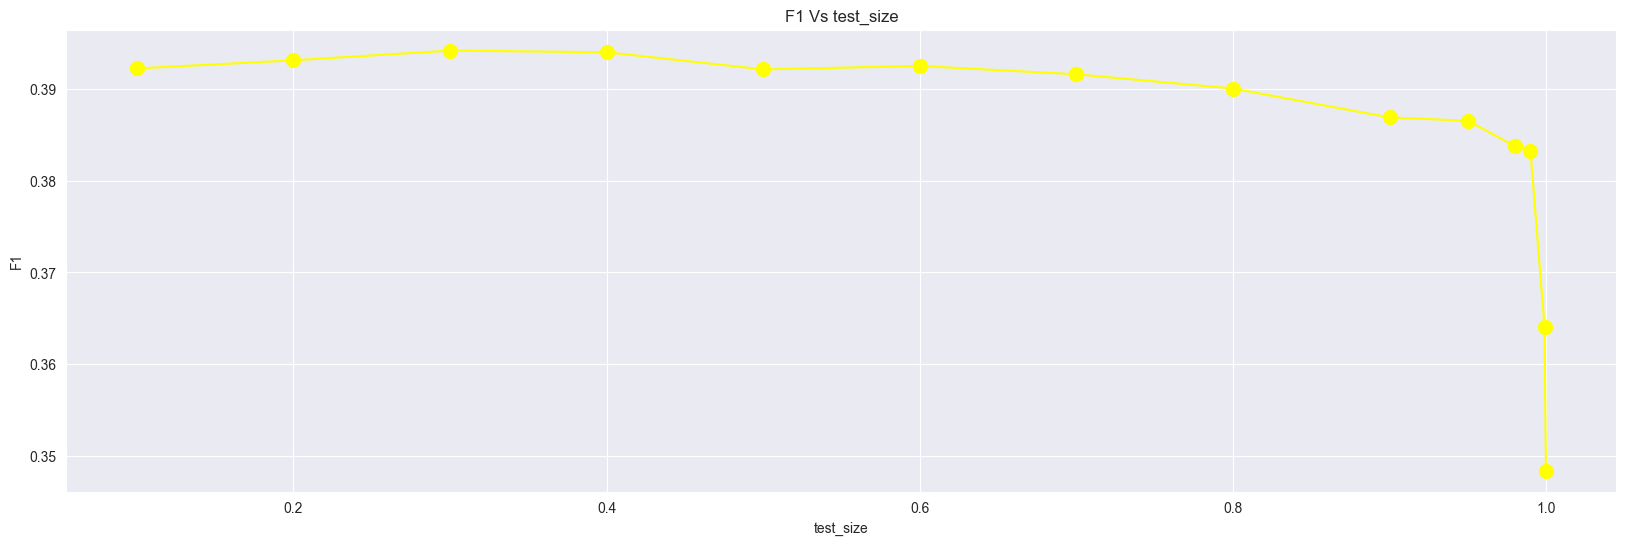

In [162]:
accuracy = []
f1_scores = []
x_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99, 0.999, 0.9999]
# Calculating error for K values between 1 and 60
for i in x_values:
    train_val, test = train_test_split(pd.concat([continueiousFeatures, onehot_df, targetFeature], axis=1),
                                       test_size=0.2)
    train, val = train_test_split(train_val, test_size=i)
    X_train, X_val = train.drop(["state"], axis=1), val.drop(["state"], axis=1)
    y_train, y_val = train['state'], val['state']
    print(f"current test_size : {i} ", end=" ")
    knn = KNeighborsClassifier(n_neighbors=7, n_jobs=-1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    acc = metrics.accuracy_score(y_val, pred_i)
    f1 = f1_score(y_true=y_val, y_pred=pred_i, average="macro")
    print(f"acc: {acc} F1: {f1} | ")
    accuracy.append(acc)
    f1_scores.append(f1)

plt.figure(figsize=(20, 6))
plt.plot(x_values, accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs test_size')
plt.xlabel('test_size')
plt.ylabel('Accuracy')

plt.figure(figsize=(20, 6))
plt.plot(x_values, f1_scores, color='yellow', marker='o',
         markersize=10)
plt.title('F1 Vs test_size')
plt.xlabel('test_size')
plt.ylabel('F1')

# KNN model with both continuous features and categorical features

Here I transformed the categorical features to one-hot vector, by doing this, KNN algorithm will be able to calculate the distance correctly for non-ordinal features i.e. `main_category` etc..

In [163]:
# Split data into training, validation and test sets

print(f"Testing Model {KNeighborsClassifier.__name__}")
neighbor_size = [3, 5, 7, 9, 11, 13]

metricNames = ["euclidean", "manhattan", "chebyshev"]
result = {}

for k in metricNames:
    result[k] = {}
    for neighbors in neighbor_size:
        print(f"Testing <metric: {k}, neighborSize: {neighbors}>: ", end="")
        knn = KNeighborsClassifier(n_neighbors=neighbors, metric=k,
                                   n_jobs=-1)  # 3 jobs will not use all the cores of my computer
        print("training...", end=" ")
        knn.fit(data.X_train, data.Y_train)
        print("evaluating...", end=" ")
        y_pred = knn.predict(data.X_val)
        print("calculating accuracy...", end=" ")
        accuracy = metrics.accuracy_score(data.Y_val, y_pred)
        print("calculating f1...", end=" ")
        f1 = f1_score(y_true=data.Y_val, y_pred=y_pred, average="macro")
        print(f"\nResult: Accuracy {accuracy}, F1 {f1}")
        result[k][neighbors] = {
            "Accuracy": accuracy,
            "F1": f1
        }
        updateBest(knn, accuracy)

Testing Model KNeighborsClassifier
Testing <metric: euclidean, neighborSize: 3>: training... evaluating... calculating accuracy... calculating f1... 
Result: Accuracy 0.8470907757931219, F1 0.4064395738635655
Testing <metric: euclidean, neighborSize: 5>: training... evaluating... calculating accuracy... calculating f1... 
Result: Accuracy 0.8628032524660091, F1 0.3957486233102803
Testing <metric: euclidean, neighborSize: 7>: training... evaluating... calculating accuracy... calculating f1... 
Result: Accuracy 0.869518128499067, F1 0.3925341492953338
Testing <metric: euclidean, neighborSize: 9>: training... evaluating... calculating accuracy... calculating f1... 
Result: Accuracy 0.8724340175953079, F1 0.3881263865918175
Testing <metric: euclidean, neighborSize: 11>: training... evaluating... calculating accuracy... calculating f1... 
Result: Accuracy 0.8736003732338044, F1 0.3851496655988723
Testing <metric: euclidean, neighborSize: 13>: training... evaluating... calculating accuracy..

After training and evaluation, we know that KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=13) achieves the highest accuracy.

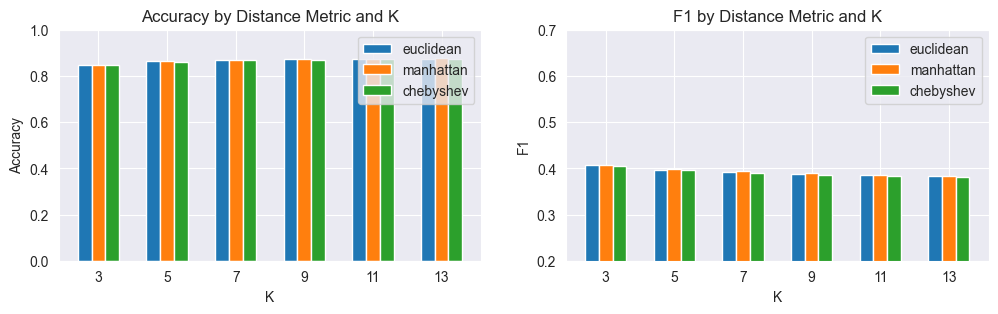

In [164]:
f = plt.figure(figsize=(12, 3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

labels = neighbor_size
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax1.bar(x - width + (width) * (index), [neighborResult[i]['Accuracy'] for i in neighborResult], width,
                   label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('K')
ax1.set_title('Accuracy by Distance Metric and K')
ax1.set_xticks(x, labels)
ax1.set_ylim([0, 1])
ax1.legend()

labels = neighbor_size
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax2.bar(x - width + (width) * (index), [neighborResult[i]['F1'] for i in neighborResult], width,
                   label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('F1')
ax2.set_xlabel('K')
ax2.set_title('F1 by Distance Metric and K')
ax2.set_xticks(x, labels)
ax2.set_ylim([0.2, 0.70])
ax2.legend()

plt.show()

# Now we have the best KNN model, further evaluate it.

Here **Best** is defined as highest accuracy. High accuracy do indicate that this model is good, but not 100%. Further evaluation will be done later on (e.g. ROC index).

In [165]:
bestModel = BestModels[KNeighborsClassifier.__name__]['model']
print(bestModel)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=13)


In [166]:
tmp = pd.DataFrame(confusion_matrix(y_true=data.Y_val, y_pred=bestModel.predict(data.X_val)))
print(tmp)

   0      1  2      3    4
0  0    374  0     82    4
1  1  31180  0    152  333
2  0    219  0     59    5
3  0     28  0  21303    0
4  0   5994  0    167  115


#### Generate Classification Report using the best model
From the report we know that, for type `1` and type `3` KNN does not preform well, but since the number of these instances are low, so it dose not significantly affect the overall accuracy.

For type `2` and type `3`, the predication are almost right.

In [167]:
print(metrics.classification_report(data.Y_test, bestModel.predict(data.X_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       534
           1       0.83      0.99      0.90     39658
           2       0.00      0.00      0.00       365
           3       0.98      1.00      0.99     26782
           4       0.32      0.02      0.04      7681

    accuracy                           0.88     75020
   macro avg       0.42      0.40      0.39     75020
weighted avg       0.82      0.88      0.83     75020



# RandomForestClassifier model with both continuous features and categorical features.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [168]:
# Split data into training, validation and test sets
print(f"Testing Model {RandomForestClassifier.__name__}")
trees = [50, 100]
min_samples = [2, 5, 6, 10]
result = {}

for k in trees:
    result[k] = {}
    for minSamples in min_samples:
        print(f"Testing <trees: {k}, min_samples: {minSamples}>: ", end="")
        rf = RandomForestClassifier(random_state=1, min_samples_split=minSamples, n_estimators=k)
        print("training...", end=" ")
        rf.fit(data.X_train, data.Y_train)
        print("evaluating...", end=" ")
        y_pred = rf.predict(data.X_val)
        accuracy = metrics.accuracy_score(data.Y_val, y_pred)
        f1 = f1_score(y_true=data.Y_val, y_pred=y_pred, average="macro")
        print(f"Result: Accuracy {accuracy}, F1 {f1}")
        result[k][minSamples] = {
            "Accuracy": accuracy,
            "F1": f1
        }
        updateBest(rf, accuracy)


Testing Model RandomForestClassifier
Testing <trees: 50, min_samples: 2>: training... evaluating... Result: Accuracy 0.8714176219674753, F1 0.40445540086747434
Testing <trees: 50, min_samples: 5>: training... evaluating... Result: Accuracy 0.8754832044788057, F1 0.39926207254750695
Testing <trees: 50, min_samples: 6>: training... evaluating... Result: Accuracy 0.8761663556384964, F1 0.4002584408534676
Testing <trees: 50, min_samples: 10>: training... evaluating... Result: Accuracy 0.8781824846707544, F1 0.3944150571313062
Testing <trees: 100, min_samples: 2>: training... evaluating... Result: Accuracy 0.8724006931484938, F1 0.40399823469881546
Testing <trees: 100, min_samples: 5>: training... evaluating... Result: Accuracy 0.8757831245001333, F1 0.398290148038674
Testing <trees: 100, min_samples: 6>: training... evaluating... Result: Accuracy 0.8772160757131432, F1 0.3988259891084808
Testing <trees: 100, min_samples: 10>: training... evaluating... Result: Accuracy 0.8785657158091176, F

From the result below we can know that when min_samples_split is 10, and number of tree is 100. This model can achieve highest accuracy.

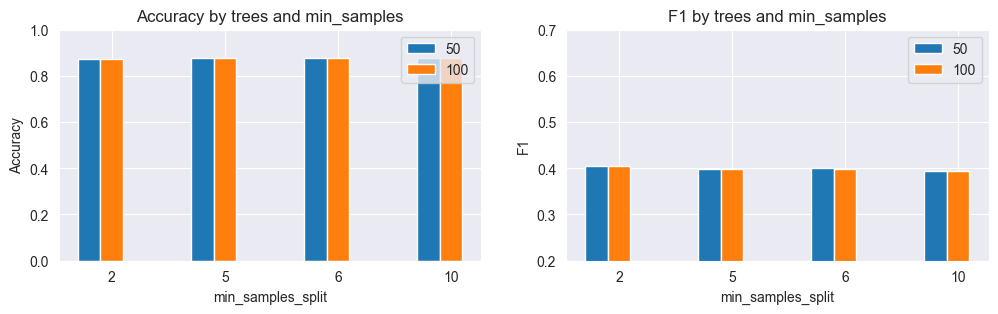

In [169]:
f = plt.figure(figsize=(12, 3))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

labels = min_samples
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax1.bar(x - width + (width) * (index), [neighborResult[i]['Accuracy'] for i in neighborResult], width,
                   label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('min_samples_split')
ax1.set_title('Accuracy by trees and min_samples')
ax1.set_xticks(x, labels)
ax1.set_ylim([0, 1])
ax1.legend()

labels = min_samples
width = 0.2  # the width of the bars
x = np.arange(len(labels))  # the label locations
for index, metricName in enumerate(result):
    neighborResult = result[metricName]
    rect = ax2.bar(x - width + (width) * (index), [neighborResult[i]['F1'] for i in neighborResult], width,
                   label=metricName)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('F1')
ax2.set_xlabel('min_samples_split')
ax2.set_title('F1 by trees and min_samples')
ax2.set_xticks(x, labels)
ax2.set_ylim([0.2, 0.70])
ax2.legend()

plt.show()

# Now we have the best RandomForestClassifier model, further evaluate it.

Here **Best** is defined as highest accuracy. High accuracy do indicate that this model is good, but not 100%. Further evaluation will be done later on (e.g. ROC index).

In [170]:
bestModel = BestModels[RandomForestClassifier.__name__]['model']
print(bestModel)

RandomForestClassifier(min_samples_split=10, random_state=1)


In [171]:
tmp = pd.DataFrame(confusion_matrix(y_true=data.Y_val, y_pred=bestModel.predict(data.X_val)))
print(tmp)

   0      1  2      3    4
0  0    385  0     66    9
1  1  31119  4      1  541
2  0    209  0     51   23
3  0      1  0  21330    0
4  0   5880  1    116  279


### Generate Classification Report using the best model

Here we can know that the model performs well on type `2` and type `3`. But not well on type `1` and type `4`. Because the number of instance belong to type `1` and type `4` are insufficient.

In [172]:
print(metrics.classification_report(data.Y_test, bestModel.predict(data.X_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       534
           1       0.83      0.98      0.90     39658
           2       0.00      0.00      0.00       365
           3       0.99      1.00      0.99     26782
           4       0.33      0.05      0.08      7681

    accuracy                           0.88     75020
   macro avg       0.43      0.41      0.40     75020
weighted avg       0.83      0.88      0.84     75020



# Decision Tree

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

In [173]:
from sklearn import metrics, tree

print(f"Testing Model {DecisionTreeClassifier.__name__}")

entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_tree.fit(categoricalData.X_train, categoricalData.Y_train)
y_pred = entropy_tree.predict(categoricalData.X_val)

updateBest(entropy_tree, accuracy)

print(metrics.classification_report(categoricalData.Y_val, y_pred, zero_division=0))

accuracy = metrics.accuracy_score(categoricalData.Y_val, y_pred)
print("Accuracy:", accuracy)

Testing Model DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       457
           1       0.79      1.00      0.88     31452
           2       0.00      0.00      0.00       294
           3       0.99      0.92      0.95     21573
           4       0.00      0.00      0.00      6240

    accuracy                           0.86     60016
   macro avg       0.36      0.38      0.37     60016
weighted avg       0.77      0.86      0.80     60016

Accuracy: 0.8551886163689683


[Text(0.4192073170731707, 0.9285714285714286, 'X[2] <= 0.5\nentropy = 1.444\nsamples = 240063\nvalue = [1794, 126801, 1178, 85641, 24649]'),
 Text(0.1524390243902439, 0.7857142857142857, 'X[1] <= 0.5\nentropy = 0.103\nsamples = 79969\nvalue = [271, 3, 181, 79103, 411]'),
 Text(0.04878048780487805, 0.6428571428571429, 'X[0] <= 0.5\nentropy = 0.648\nsamples = 653\nvalue = [2, 0, 19, 574, 58]'),
 Text(0.024390243902439025, 0.5, 'entropy = 0.472\nsamples = 345\nvalue = [0, 0, 5, 316, 24]'),
 Text(0.07317073170731707, 0.5, 'X[0] <= 1.5\nentropy = 0.815\nsamples = 308\nvalue = [2, 0, 14, 258, 34]'),
 Text(0.04878048780487805, 0.35714285714285715, 'entropy = 0.824\nsamples = 303\nvalue = [2, 0, 14, 253, 34]'),
 Text(0.0975609756097561, 0.35714285714285715, 'entropy = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0]'),
 Text(0.25609756097560976, 0.6428571428571429, 'X[0] <= 1.5\nentropy = 0.096\nsamples = 79316\nvalue = [269, 3, 162, 78529, 353]'),
 Text(0.1951219512195122, 0.5, 'X[0] <= 0.5\nentropy

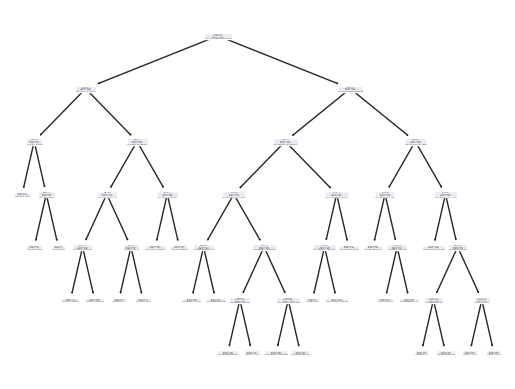

In [174]:
tree.plot_tree(entropy_tree)

# Now we have the best DecisionTreeClassifier model, further evaluate it.

Here **Best** is defined as highest accuracy. High accuracy do indicate that this model is good, but not 100%. Further evaluation will be done later on (e.g. ROC index).

In [175]:
bestModel = BestModels[DecisionTreeClassifier.__name__]['model']
print(bestModel)

DecisionTreeClassifier(criterion='entropy', random_state=42)


In [176]:
tmp = pd.DataFrame(confusion_matrix(y_true=categoricalData.Y_val, y_pred=bestModel.predict(categoricalData.X_val)))
print(tmp)

   0      1  2      3  4
0  0    387  0     70  0
1  0  31452  0      0  0
2  0    257  0     37  0
3  0   1700  0  19873  0
4  0   6145  0     95  0


### Generate Classification Report using the best model

Here we can know that this model preforms well on type `2` and `4` but also not good on `0`, `1`, `3`

In [177]:
print(metrics.classification_report(categoricalData.Y_test, bestModel.predict(categoricalData.X_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       548
           1       0.79      1.00      0.88     39466
           2       0.00      0.00      0.00       374
           3       0.99      0.92      0.96     26742
           4       0.00      0.00      0.00      7890

    accuracy                           0.86     75020
   macro avg       0.36      0.38      0.37     75020
weighted avg       0.77      0.86      0.80     75020



# GaussianNB

Gaussian Naive Bayes (GaussianNB).

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:
$$
P\left(x_i \mid y\right)=\frac{1}{\sqrt{2 \pi \sigma_y^2}} \exp \left(-\frac{\left(x_i-\mu_y\right)^2}{2 \sigma_y^2}\right)
$$


In [178]:
print(f"Testing Model {GaussianNB.__name__}")
metricValue = range(1, 10)
result = {}
accuracy = []
xData = []
for k in metricValue:
    result[k] = {}
    print(f"Testing <metric: {k}>: ", end="")
    gn = GaussianNB(var_smoothing=0.1 * k)
    xData.append(0.1 * k)
    gn.fit(categoricalData.X_train, categoricalData.Y_train)
    y_pred = gn.predict(categoricalData.X_val)
    acc = metrics.accuracy_score(categoricalData.Y_val, y_pred)
    accuracy.append(acc)
    f1 = f1_score(y_true=categoricalData.Y_val, y_pred=y_pred, average="macro")
    print(f"Result: Accuracy {acc}, F1 {f1}")
    result[k][0] = {
        "Accuracy": accuracy,
        "F1": f1
    }
    updateBest(gn, acc)

Testing Model GaussianNB
Testing <metric: 1>: Result: Accuracy 0.8551886163689683, F1 0.3670852651466377
Testing <metric: 2>: Result: Accuracy 0.8551886163689683, F1 0.3670852651466377
Testing <metric: 3>: Result: Accuracy 0.8551886163689683, F1 0.3670852651466377
Testing <metric: 4>: Result: Accuracy 0.8149160223940283, F1 0.34746823387656073
Testing <metric: 5>: Result: Accuracy 0.8149160223940283, F1 0.34746823387656073
Testing <metric: 6>: Result: Accuracy 0.8149160223940283, F1 0.34746823387656073
Testing <metric: 7>: Result: Accuracy 0.8149160223940283, F1 0.34746823387656073
Testing <metric: 8>: Result: Accuracy 0.8136163689682752, F1 0.34690143371328774
Testing <metric: 9>: Result: Accuracy 0.8136163689682752, F1 0.34690143371328774


# How dose `var_smoothing` affect the accuracy of our model?

Text(0, 0.5, 'Accuracy')

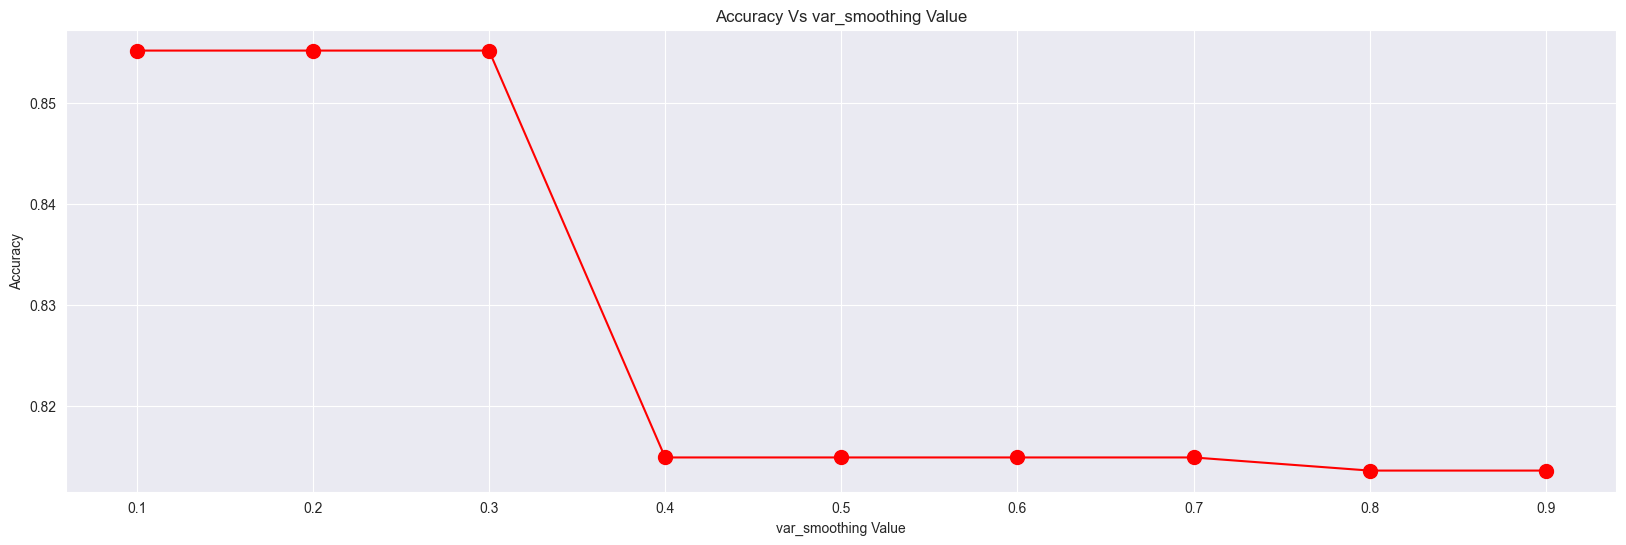

In [179]:
plt.figure(figsize=(20, 6))
plt.plot(xData, accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs var_smoothing Value')
plt.xlabel('var_smoothing Value')
plt.ylabel('Accuracy')

# Now we have the best GaussianNB model, further evaluate it.

Here **Best** is defined as highest accuracy. High accuracy do indicate that this model is good, but not 100%. Further evaluation will be done later on (e.g. ROC index).

In [180]:
bestModel = BestModels[GaussianNB.__name__]['model']
print(bestModel)

GaussianNB(var_smoothing=0.1)


In [181]:
tmp = pd.DataFrame(confusion_matrix(y_true=categoricalData.Y_val, y_pred=bestModel.predict(categoricalData.X_val)))
print(tmp)

   0      1  2      3  4
0  0    387  0     70  0
1  0  31452  0      0  0
2  0    257  0     37  0
3  0   1700  0  19873  0
4  0   6145  0     95  0


### Generate Classification Report using the best model

Similarly, this model also performs well on type `2` and type `4`, but did not perform well on `0`, `1`, `3`. Because the number of instance are insufficient.

In [182]:
print(metrics.classification_report(categoricalData.Y_test, bestModel.predict(categoricalData.X_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       548
           1       0.79      1.00      0.88     39466
           2       0.00      0.00      0.00       374
           3       0.99      0.92      0.96     26742
           4       0.00      0.00      0.00      7890

    accuracy                           0.86     75020
   macro avg       0.36      0.38      0.37     75020
weighted avg       0.77      0.86      0.80     75020



# LogisticRegression

Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’.

In [183]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)  # supress ConvergenceWarning error

#### Train LogisticRegression model to find the best model

Here **Best** is defined as highest accuracy. High accuracy do indicate that this model is good, but not 100%. Further evaluation will be done later on (e.g. ROC index).

In [184]:
print(f"Testing Model {LogisticRegression.__name__}")
metricValue = range(1, 10)
result = {}
accuracy = []
xData = []
for c in metricValue:
    result[c] = {}
    print(f"Testing <metric: {c}>: ", end="")
    model = LogisticRegression(C=c)
    xData.append(c)
    model.fit(data.X_train, data.Y_train)
    y_pred = model.predict(data.X_val)
    acc = metrics.accuracy_score(data.Y_val, y_pred)
    accuracy.append(acc)
    f1 = f1_score(y_true=data.Y_val, y_pred=y_pred, average="macro")
    print(f"Result: Accuracy {acc}, F1 {f1}")
    result[c][0] = {
        "Accuracy": accuracy,
        "F1": f1
    }
    updateBest(model, acc)


Testing Model LogisticRegression
Testing <metric: 1>: Result: Accuracy 0.8674686750199947, F1 0.3789096426004156
Testing <metric: 2>: Result: Accuracy 0.8679685417222074, F1 0.3807144280951898
Testing <metric: 3>: Result: Accuracy 0.8694681418288457, F1 0.37889562371472196
Testing <metric: 4>: Result: Accuracy 0.86990135963743, F1 0.3787912398489627
Testing <metric: 5>: Result: Accuracy 0.8715509197547321, F1 0.37829903490350036
Testing <metric: 6>: Result: Accuracy 0.8683517728605705, F1 0.3784712886060212
Testing <metric: 7>: Result: Accuracy 0.8676186350306585, F1 0.3776924103976651
Testing <metric: 8>: Result: Accuracy 0.8674853372434017, F1 0.3796236406466472
Testing <metric: 9>: Result: Accuracy 0.8712343375099973, F1 0.37846235078738333


# Plot a figure when C value increases.

$C$ is the Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

Text(0, 0.5, 'Accuracy')

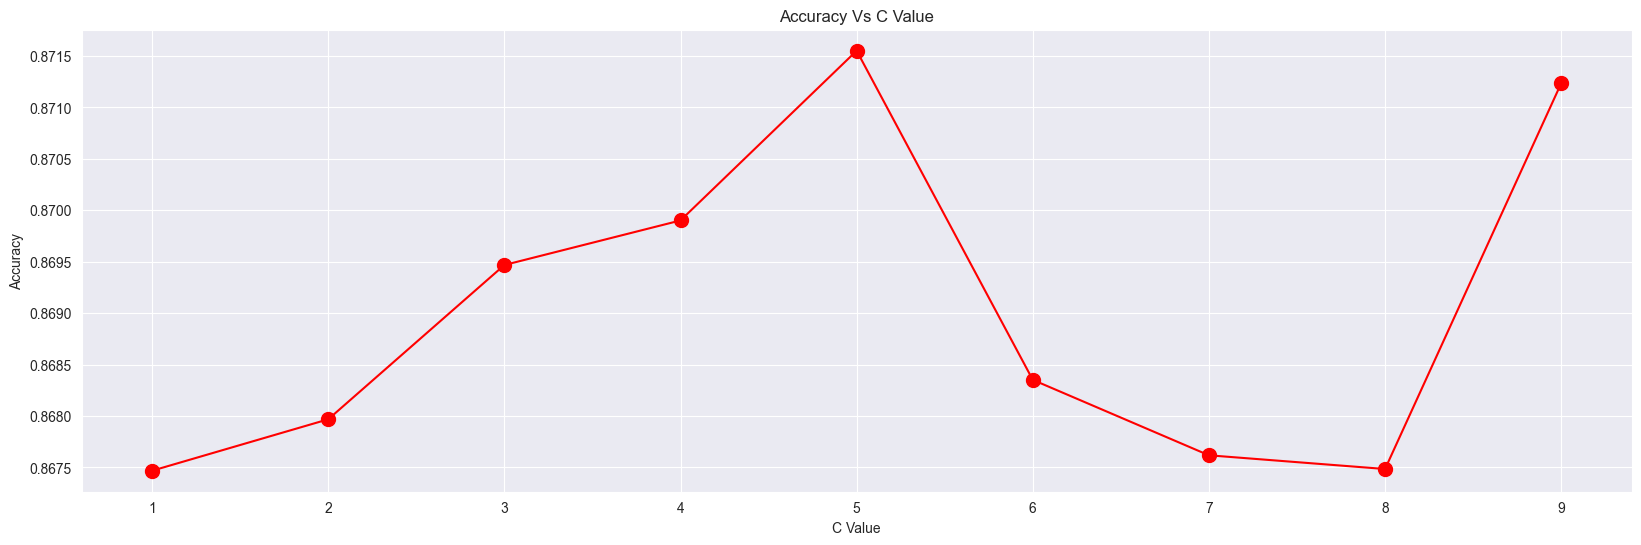

In [185]:
plt.figure(figsize=(20, 6))
plt.plot(xData, accuracy, color='red', marker='o',
         markersize=10)
plt.title('Accuracy Vs C Value')
plt.xlabel('C Value')
plt.ylabel('Accuracy')

In [186]:
bestModel = BestModels[LogisticRegression.__name__]['model']
tmp = pd.DataFrame(confusion_matrix(y_true=data.Y_val, y_pred=bestModel.predict(data.X_val)))
print(tmp)

   0      1  2      3    4
0  0    383  0     70    7
1  2  31459  0     92  113
2  0    223  0     56    4
3  3    246  0  20799  283
4  0   6075  0    152   49


#### Generate Classification Report using the best model

Here we can know that this model performs well on type `2` and type `4`. And are a little better than other models on type `1`.

In [187]:
print(bestModel)
print(metrics.classification_report(data.Y_test, bestModel.predict(data.X_test), zero_division=0))

LogisticRegression(C=5)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       534
           1       0.82      0.99      0.90     39658
           2       0.00      0.00      0.00       365
           3       0.98      0.97      0.98     26782
           4       0.09      0.01      0.01      7681

    accuracy                           0.87     75020
   macro avg       0.38      0.39      0.38     75020
weighted avg       0.80      0.87      0.83     75020



# Ensembles
The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

## Bagging

For the bagging classifier we need a base model. I will use logistic regression as our base model.

In [188]:
print(f"Testing Model {BaggingClassifier.__name__}")
bag_clf = BaggingClassifier(base_estimator=BestModels[LogisticRegression.__name__]['model'], n_estimators=10, n_jobs=-1,
                            verbose=True)

bag_clf.fit(data.X_train, data.Y_train.values.ravel())

Testing Model BaggingClassifier


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:   13.4s remaining:   53.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:   15.8s finished


BaggingClassifier(base_estimator=LogisticRegression(C=5), n_jobs=-1,
                  verbose=True)

From the table below we can know that, Bagging performs well on type `2` and type `4`, and a little well on `1`. But not good on `0` and `3`

In bagging, A basic estimator (such as a decision tree) is constructed by introducing randomization and then integrating it to reduce its variance. So the performance of bagging is still largely related to the base model used.

In [189]:
pred = bag_clf.predict(data.X_test)
print(metrics.classification_report(y_pred=pred, y_true=data.Y_test))

accuracy = metrics.accuracy_score(data.Y_test, pred)
updateBest(bag_clf, accuracy)
print(f"Accuracy: {accuracy}")

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       534
           1       0.82      0.99      0.90     39658
           2       0.00      0.00      0.00       365
           3       0.98      0.97      0.98     26782
           4       0.09      0.01      0.01      7681

    accuracy                           0.87     75020
   macro avg       0.38      0.39      0.38     75020
weighted avg       0.79      0.87      0.83     75020

Accuracy: 0.8717275393228472


## Boosting
Gradient Boosting is a major class of algorithms in Boosting, which is based on the idea of gradient descent method. Its basic principle is to train the newly added weak classifiers according to the negative gradient information of the loss function of the current model, and then combine the trained weak classifiers into the existing model in the form of accumulation.

In [190]:
gb_clf = GradientBoostingClassifier(n_estimators=100, verbose=True)
gb_clf.fit(data.X_train, data.Y_train.values.ravel())

      Iter       Train Loss   Remaining Time 
         1           0.8741            2.44m
         2           0.7793            2.42m
         3           0.7063            2.41m
         4           0.6486            2.38m
         5           0.6021            2.38m
         6           0.5638            2.34m
         7           0.5325            2.29m
         8           0.5063            2.25m
         9           0.4841            2.25m
        10           0.4655            2.25m
        20           0.3768            1.96m
        30           0.3520            1.78m
        40           0.3423            1.51m
        50           0.3379            1.26m
        60           0.3359            1.00m
        70           0.3345           44.90s
        80           0.3336           29.82s
        90           0.3327           14.93s
       100           0.3318            0.00s


GradientBoostingClassifier(verbose=True)

From the table below, we can know that this method performs much better on the classes that other model did not perform well.

In [191]:
pred = gb_clf.predict(data.X_test)
print(metrics.classification_report(y_pred=pred, y_true=data.Y_test))

accuracy = metrics.accuracy_score(data.Y_test, pred)
updateBest(gb_clf, accuracy)
print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

           0       0.27      0.01      0.03       534
           1       0.83      1.00      0.91     39658
           2       0.00      0.00      0.00       365
           3       0.99      1.00      0.99     26782
           4       0.65      0.01      0.01      7681

    accuracy                           0.89     75020
   macro avg       0.55      0.40      0.39     75020
weighted avg       0.86      0.89      0.84     75020

Accuracy: 0.8856704878699013


## VotingClassifier

Here we choose `soft` voting, because:
* Hard voting is based on the decision (Determining the final outcome based on the majority of the minority.)
* Soft voting is based on the probability (The average of the probability of all model prediction samples being of a certain type is used as the criterion, and the type corresponding to the highest probability is the final prediction result. which is more reasonable)
* The majority rule approach is sometimes unreasonable, a more reasonable approach would be probability based. Similar to voting in a singing contest, professional judges score higher and general viewers score lower.

In [192]:
print(f"Testing Model {VotingClassifier.__name__}")

tree_clf = BestModels[DecisionTreeClassifier.__name__]['model']
knn_clf = BestModels[KNeighborsClassifier.__name__]['model']
randf_clf = BestModels[RandomForestClassifier.__name__]['model']
log_clf = BestModels[LogisticRegression.__name__]['model']
gauss_clf = BestModels[GaussianNB.__name__]['model']

print(f"""
Ensemble:
{tree_clf}
{knn_clf}
{randf_clf}
{log_clf}
{gauss_clf}
""")

voting_clf = VotingClassifier(
    [('decTree', tree_clf), ('KNN', knn_clf), ('RandForest', randf_clf), ('Logistic', log_clf), ('gauss', gauss_clf)],
    weights=None,
    voting='soft',
    verbose=True)
voting_clf.fit(data.X_train, data.Y_train.values.ravel())

Testing Model VotingClassifier

Ensemble:
DecisionTreeClassifier(criterion='entropy', random_state=42)
KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=13)
RandomForestClassifier(min_samples_split=10, random_state=1)
LogisticRegression(C=5)
GaussianNB(var_smoothing=0.1)

[Voting] .................. (1 of 5) Processing decTree, total=   2.1s
[Voting] ...................... (2 of 5) Processing KNN, total=   0.9s
[Voting] ............... (3 of 5) Processing RandForest, total=  28.4s
[Voting] ................. (4 of 5) Processing Logistic, total=   6.8s
[Voting] .................... (5 of 5) Processing gauss, total=   0.1s


VotingClassifier(estimators=[('decTree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=42)),
                             ('KNN',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_jobs=-1, n_neighbors=13)),
                             ('RandForest',
                              RandomForestClassifier(min_samples_split=10,
                                                     random_state=1)),
                             ('Logistic', LogisticRegression(C=5)),
                             ('gauss', GaussianNB(var_smoothing=0.1))],
                 verbose=True, voting='soft')

In [195]:
accuracy = metrics.accuracy_score(data.Y_val, voting_clf.predict(data.X_val))
updateBest(voting_clf, accuracy)

# Now we have the best VotingClassifier model, further evaluate it.

Here **Best** is defined as highest accuracy. High accuracy do indicate that this model is good, but not 100%. Further evaluation will be done later on (e.g. ROC index).

In [196]:
bestModel = BestModels[VotingClassifier.__name__]['model']
print(bestModel)

VotingClassifier(estimators=[('decTree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=42)),
                             ('KNN',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_jobs=-1, n_neighbors=13)),
                             ('RandForest',
                              RandomForestClassifier(min_samples_split=10,
                                                     random_state=1)),
                             ('Logistic', LogisticRegression(C=5)),
                             ('gauss', GaussianNB(var_smoothing=0.1))],
                 verbose=True, voting='soft')


In [197]:
tmp = pd.DataFrame(confusion_matrix(y_true=data.Y_val, y_pred=bestModel.predict(data.X_val)))
print(tmp)

   0      1  2      3   4
0  0    390  0     66   4
1  0  31603  0      1  62
2  0    228  0     51   4
3  0      4  0  21326   1
4  0   6117  0    117  42


### Generate Classification Report using the best model

Here we can see that, since the voting approach provide a way to **synthesis the result** predicted by all of these models, so it performs much better on nearly better on different classes.

In [198]:
print(metrics.classification_report(data.Y_test, bestModel.predict(data.X_test), zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       534
           1       0.83      1.00      0.90     39658
           2       1.00      0.00      0.00       365
           3       0.99      1.00      0.99     26782
           4       0.35      0.01      0.01      7681

    accuracy                           0.89     75020
   macro avg       0.83      0.40      0.38     75020
weighted avg       0.84      0.89      0.83     75020



# Here I also did experiment on `hard` voting.

In [218]:
print(f"Testing Model {VotingClassifier.__name__}")

tree_clf = BestModels[DecisionTreeClassifier.__name__]['model']
knn_clf = BestModels[KNeighborsClassifier.__name__]['model']
randf_clf = BestModels[RandomForestClassifier.__name__]['model']
log_clf = BestModels[LogisticRegression.__name__]['model']
gauss_clf = BestModels[GaussianNB.__name__]['model']

print(f"""
Ensemble:
{tree_clf}
{knn_clf}
{randf_clf}
{log_clf}
{gauss_clf}
""")

voting_clf_hard = VotingClassifier(
    [('decTree', tree_clf), ('KNN', knn_clf), ('RandForest', randf_clf), ('Logistic', log_clf), ('gauss', gauss_clf)],
    weights=None,
    voting='hard',
    verbose=True)
voting_clf_hard.fit(data.X_train, data.Y_train.values.ravel())
accuracy = metrics.accuracy_score(data.Y_val, voting_clf_hard.predict(data.X_val))
print(accuracy)
print(metrics.classification_report(data.Y_test, voting_clf_hard.predict(data.X_test), zero_division=1))

Testing Model VotingClassifier

Ensemble:
DecisionTreeClassifier(criterion='entropy', random_state=42)
KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=13)
RandomForestClassifier(min_samples_split=10, random_state=1)
LogisticRegression(C=5)
GaussianNB(var_smoothing=0.1)

[Voting] .................. (1 of 5) Processing decTree, total=   3.0s
[Voting] ...................... (2 of 5) Processing KNN, total=   0.7s
[Voting] ............... (3 of 5) Processing RandForest, total=  42.9s
[Voting] ................. (4 of 5) Processing Logistic, total=   8.9s
[Voting] .................... (5 of 5) Processing gauss, total=   0.1s
0.8821480938416423
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       534
           1       0.83      1.00      0.90     39658
           2       1.00      0.00      0.00       365
           3       0.99      1.00      0.99     26782
           4       0.42      0.01      0.02      7681

    accuracy 

# From the result above we can see that the `soft` voting performs better than `hard` voting.

Because probability based method are more reasonable.

*The majority rule approach is sometimes unreasonable, a more reasonable approach would be probability based. Similar to voting in a singing contest, professional judges score higher and general viewers score lower.*

# Now, we take a look at the overall model accuracy.

In [199]:
for key in BestModels:
    modelData = BestModels[key]
    name = modelData['model'].__class__.__name__
    accuracy = modelData['accuracy']
    print("%30s %10f" % (name, accuracy))

          KNeighborsClassifier   0.876400
        RandomForestClassifier   0.878566
        DecisionTreeClassifier   0.878566
                    GaussianNB   0.855189
            LogisticRegression   0.871551
              VotingClassifier   0.882615
             BaggingClassifier   0.871728
    GradientBoostingClassifier   0.885670


<BarContainer object of 8 artists>

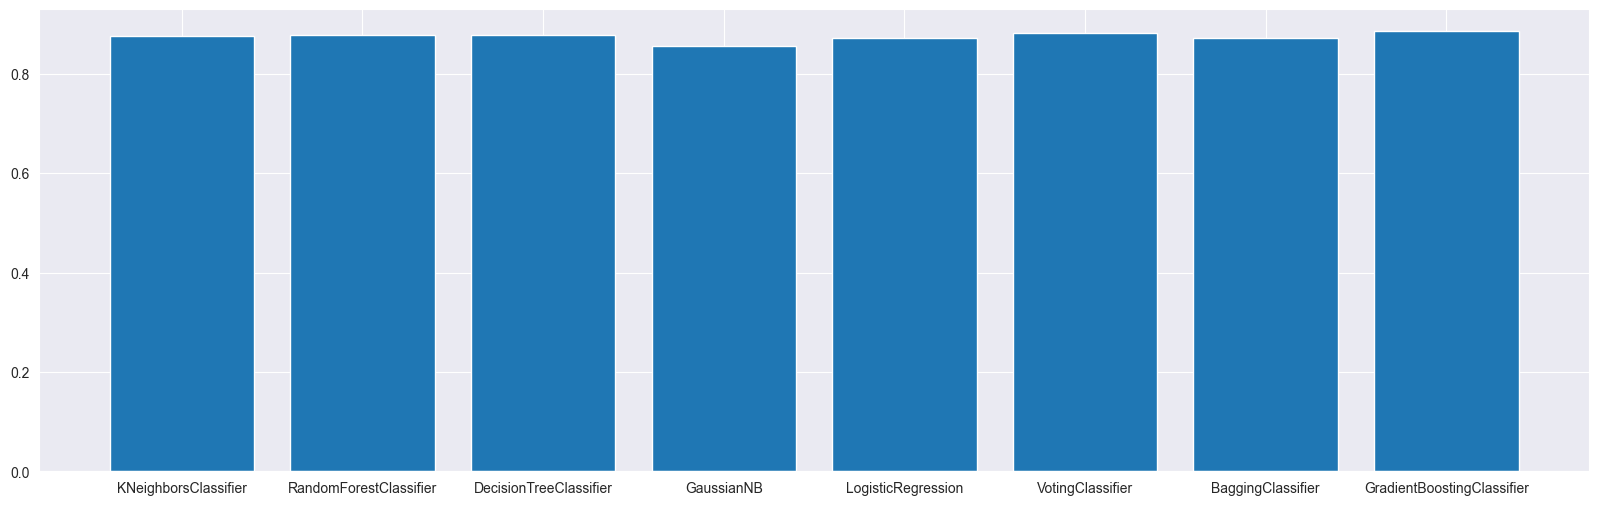

In [217]:
plt.figure(figsize=(20, 6))
plt.bar(BestModels.keys(), [BestModels[i]['accuracy'] for i in BestModels.keys()])

# Overall, `GradientBoostingClassifier` and `VotingClassifier` demonstrates the highest accuracy.

This is because,

* `GradientBoostingClassifier` utilizes gradient boosting technique which indirect adds more characters to the original dataset, so it performs better than other model.
* `VotingClassifier` predict the target by synthesis the result provided by other models, **some models may perform well on one feature but others are not**. **Voting approach can take this as an advantage** and thus performs well than any other models.

In [200]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ROC Curve and ROC Index

The ROC curve is plotted with the true positive rate (sensitivity) as the vertical coordinate and the false positive rate (1-specificity) as the horizontal coordinate. Each point corresponds to an intercept point of a diagnostic test, and we connect these possible points to create an empirical ROC curve. This method helps researchers to analyze the accuracy of diagnostic tests in a simple and intuitive way and to select more appropriate cut-off points.

# Firstly, For each model

# Define a function to calculate `fpr(micro)`, `tpr(micro)` and `roc_auc(micro)`

In [201]:
def calc_fpr_tpr(n_classes, pred, y):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return fpr, roc_auc, tpr



# A utility function for me to draw multiclassROC, with `ax` parameter we can control the subplot.

In [202]:
def multiclassROC(model, x_test=data.X_test, y_test=data.Y_test, ax=None):
    y = label_binarize(y_test, classes=list(set(y_test)))
    n_classes = y.shape[1]
    pred = model.predict_proba(x_test)
    fpr, roc_auc, tpr = calc_fpr_tpr(n_classes, pred, y)
    # Plot ROC curve
    if ax != None:
        ax.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                      ''.format(roc_auc["micro"]))
        for i in range(n_classes):
            ax.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                          ''.format(i, roc_auc[i]))

        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve - {model.__class__.__name__}')
        ax.legend(loc="lower right")
    else:
        plt.figure()
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]))
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model.__class__.__name__}')
        plt.legend(loc="lower right")
        plt.show()



# From the graph below we know that
* KNN and DecisionTree did not perform good on class 0 and class 3, since the curve is more close to the diagonal.
* RandomForest is better since all the curve are more away from the diagonal.

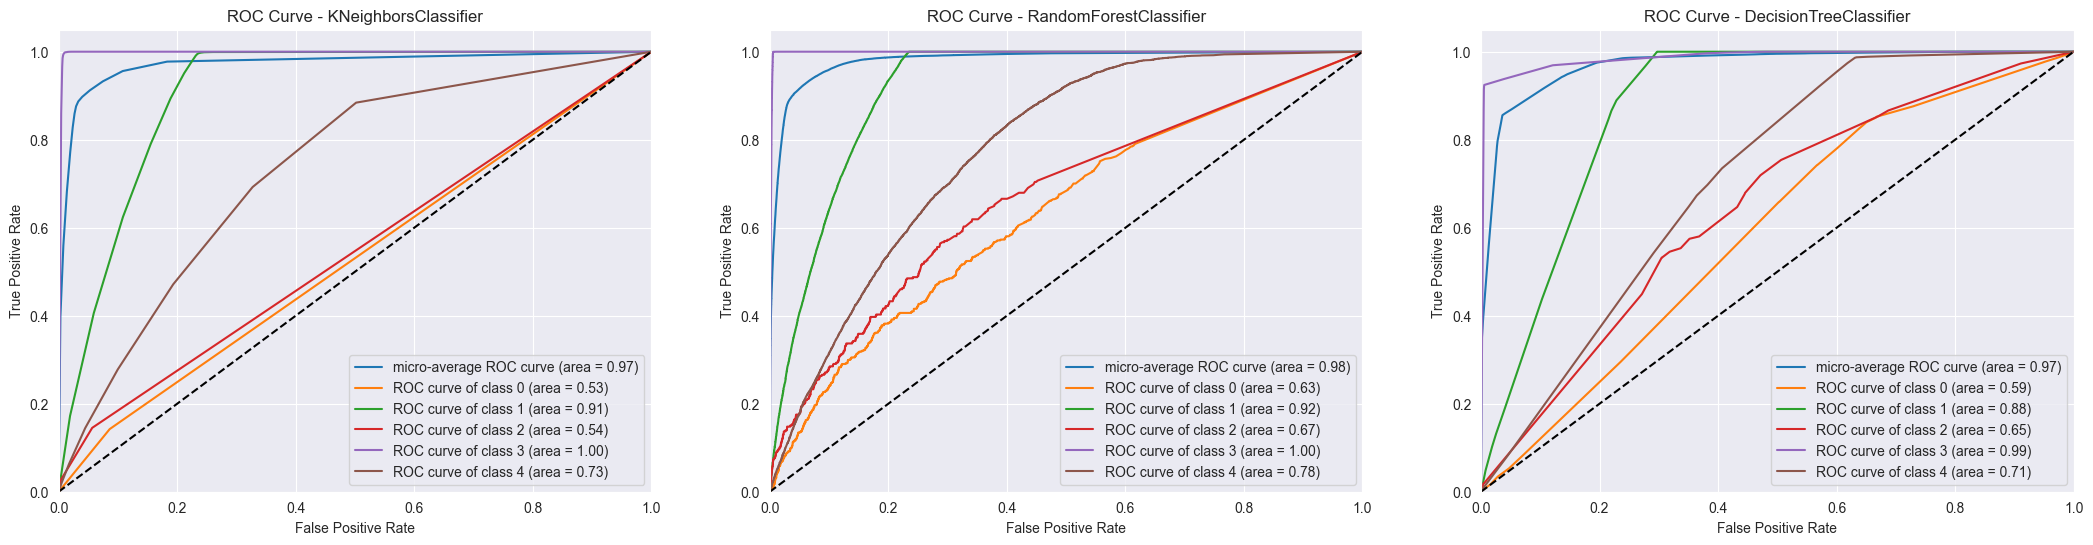

In [203]:
fig = plt.figure(figsize=(26, 6))
ax1 = fig.add_subplot(131)
multiclassROC(BestModels[KNeighborsClassifier.__name__]['model'], ax=ax1)

ax1 = fig.add_subplot(132)
multiclassROC(BestModels[RandomForestClassifier.__name__]['model'], ax=ax1)

ax1 = fig.add_subplot(133)
multiclassROC(BestModels[DecisionTreeClassifier.__name__]['model'], x_test=categoricalData.X_test,
              y_test=categoricalData.Y_test, ax=ax1)


# From the graph below we know that
* GaussianNB and LogisticRegression demonstrate similar result, the distance of each class for both of these two model are similar.

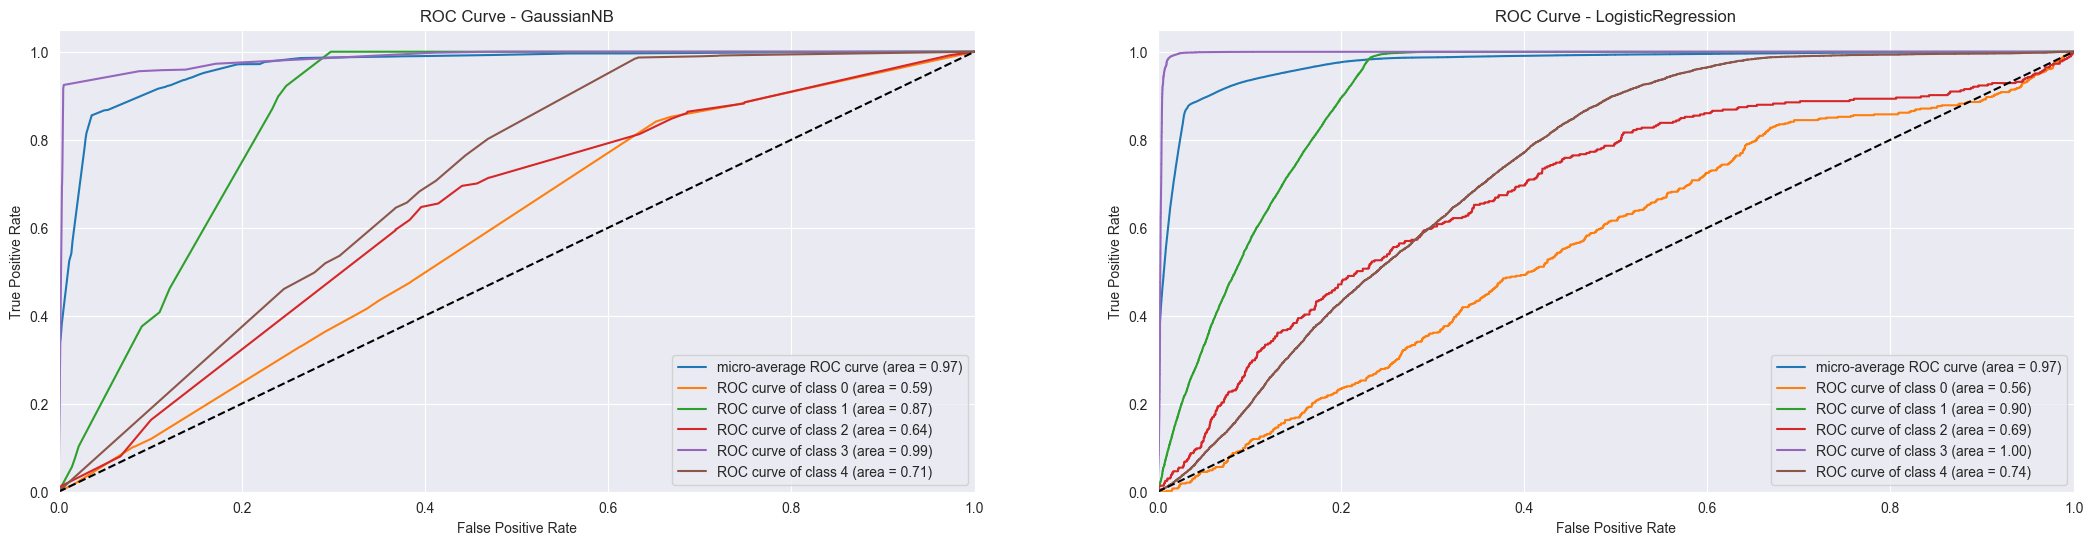

In [204]:
fig = plt.figure(figsize=(26, 6))
ax1 = fig.add_subplot(121)
multiclassROC(BestModels[GaussianNB.__name__]['model'], x_test=categoricalData.X_test, y_test=categoricalData.Y_test,
              ax=ax1)

ax1 = fig.add_subplot(122)
multiclassROC(BestModels[LogisticRegression.__name__]['model'], ax=ax1)

# From the graph below we know that

* These ensemble method performs generally better than non-ensemble models, since these models add extra processing methods or considers the result generated by different models.

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    2.9s remaining:   11.8s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    3.3s finished


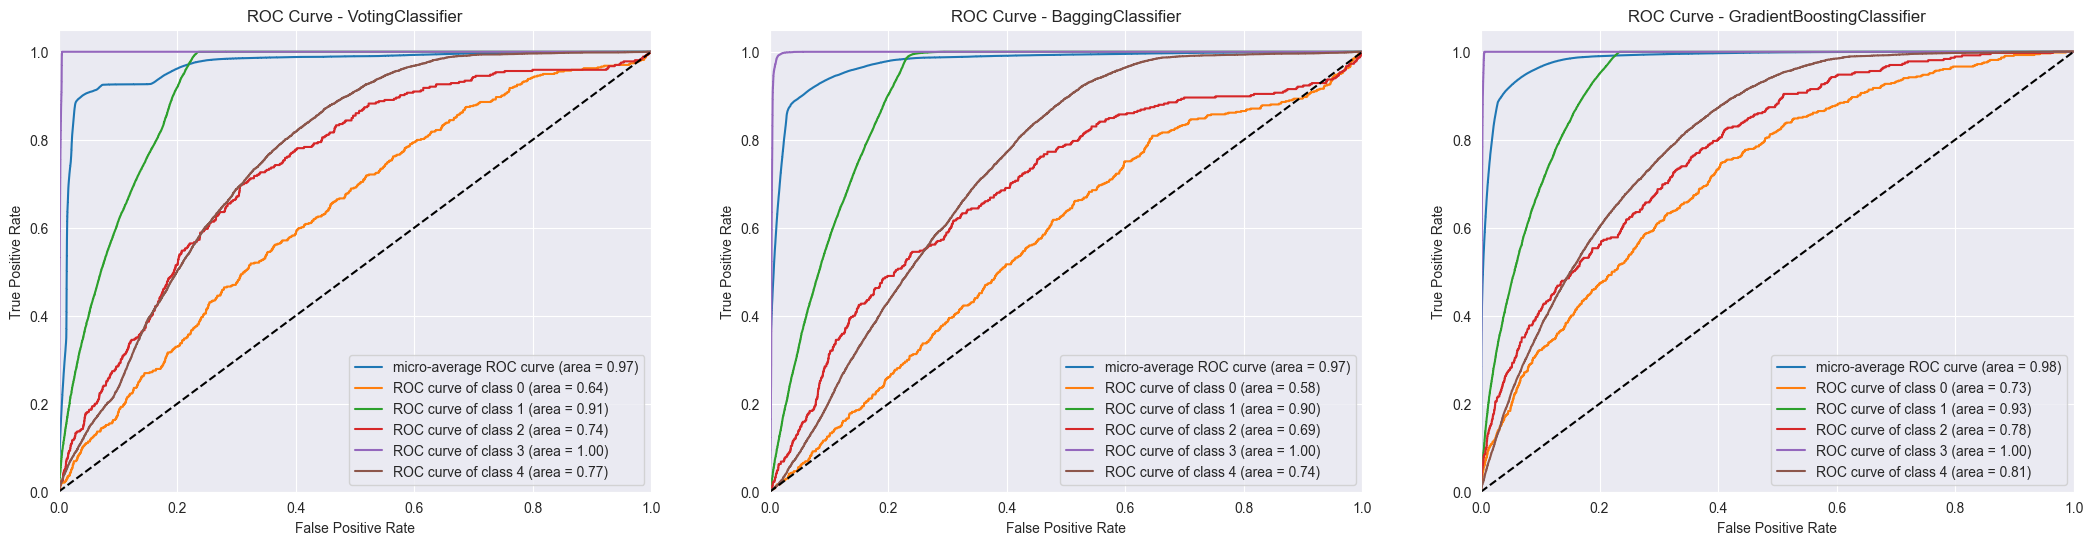

In [205]:
fig = plt.figure(figsize=(26, 6))
ax1 = fig.add_subplot(131)
multiclassROC(BestModels[VotingClassifier.__name__]['model'], ax=ax1)

ax1 = fig.add_subplot(132)
multiclassROC(BestModels[BaggingClassifier.__name__]['model'], ax=ax1)

ax1 = fig.add_subplot(133)
multiclassROC(BestModels[GradientBoostingClassifier.__name__]['model'], ax=ax1)


# Now we draw the average ROC to one figure.

Now we can draw all the ROC line (Average) of each class to the same graph to compare the overall performance of these models.

# Define a function to get MicroROC

In [206]:
def getMicroROC(model, x_test=data.X_test, y_test=data.Y_test):
    y = label_binarize(y_test, classes=list(set(y_test)))
    n_classes = y.shape[1]
    pred = model.predict_proba(x_test)
    fpr, roc_auc, tpr = calc_fpr_tpr(n_classes, pred, y)
    return fpr["micro"], tpr["micro"], roc_auc['micro']

# A utility function for drawing

In [207]:
def drawROC(model, x_test=data.X_test, y_test=data.Y_test):
    micro_fpr, micro_tpr, micro_roc = getMicroROC(model, x_test=x_test, y_test=y_test)
    plt.plot(micro_fpr, micro_tpr,
             label=f'micro-average ROC <{model.__class__.__name__}> (area = {"%0.2f" % micro_roc})')

# Draw these lines to the same graph

From the graph we can know that, all of these models performs generally well on this dataset. The ensemble based methods performs generally better than other methods.

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


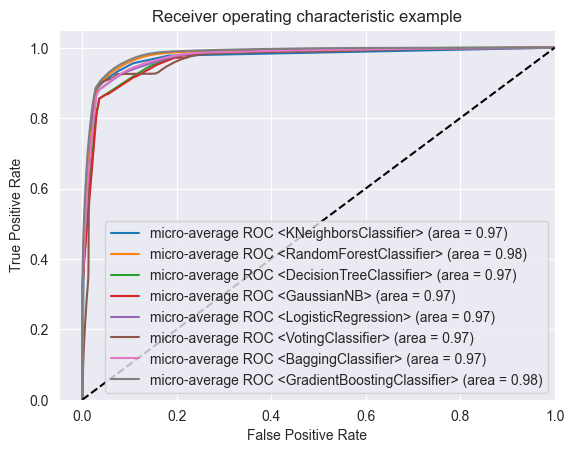

In [208]:
plt.figure()
drawROC(BestModels[KNeighborsClassifier.__name__]['model'])
drawROC(BestModels[RandomForestClassifier.__name__]['model'])
drawROC(BestModels[DecisionTreeClassifier.__name__]['model'], x_test=categoricalData.X_test,
        y_test=categoricalData.Y_test)
drawROC(BestModels[GaussianNB.__name__]['model'], x_test=categoricalData.X_test, y_test=categoricalData.Y_test)
drawROC(BestModels[LogisticRegression.__name__]['model'])
drawROC(BestModels[VotingClassifier.__name__]['model'])
drawROC(BestModels[BaggingClassifier.__name__]['model'])
drawROC(BestModels[GradientBoostingClassifier.__name__]['model'])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Cross-Validation

To get an idea about how our models work with different training samples, we can use cross-validation.

In [209]:
from sklearn.model_selection import cross_val_score


def runCrossValidation(model, X_train_val=data.X_train_val, Y_train_val=data.Y_train_val):
    print(f"Running <{model.__class__.__name__}>: ", end="")
    scores = cross_val_score(estimator=model, X=X_train_val, y=Y_train_val.values.ravel(), cv=10,
                             scoring='accuracy', n_jobs=-1)
    print(f'{model.__class__.__name__} - Accuracy: %0.3f std: %0.4f' % (scores.mean(), scores.std()))

In [210]:
runCrossValidation(BestModels[KNeighborsClassifier.__name__]['model'])
runCrossValidation(BestModels[RandomForestClassifier.__name__]['model'])
runCrossValidation(BestModels[DecisionTreeClassifier.__name__]['model'], X_train_val=categoricalData.X_train_val,
                   Y_train_val=categoricalData.Y_train_val)
runCrossValidation(BestModels[GaussianNB.__name__]['model'], X_train_val=categoricalData.X_train_val,
                   Y_train_val=categoricalData.Y_train_val)
runCrossValidation(BestModels[LogisticRegression.__name__]['model'])
runCrossValidation(BestModels[VotingClassifier.__name__]['model'])
runCrossValidation(BestModels[BaggingClassifier.__name__]['model'])
# The cross validation for GradientBoostingClassifier will run a really long time, so I comment this line out. If you need to do cross validation on this model, please uncomment this line.
# runCrossValidation(BestModels[GradientBoostingClassifier.__name__]['model'])

Running <KNeighborsClassifier>: KNeighborsClassifier - Accuracy: 0.878 std: 0.0006
Running <RandomForestClassifier>: RandomForestClassifier - Accuracy: 0.880 std: 0.0006
Running <DecisionTreeClassifier>: DecisionTreeClassifier - Accuracy: 0.857 std: 0.0008
Running <GaussianNB>: GaussianNB - Accuracy: 0.857 std: 0.0008
Running <LogisticRegression>: LogisticRegression - Accuracy: 0.867 std: 0.0016
Running <VotingClassifier>: VotingClassifier - Accuracy: 0.883 std: 0.0003
Running <BaggingClassifier>: BaggingClassifier - Accuracy: 0.869 std: 0.0010


From the result above, we can know that the performance of these models are stable.

In [211]:
endTime = datetime.now()

In [212]:
print(f"Total Running time: {endTime - startTime}")

Total Running time: 0:22:16.781365
